# Project Part 2

# Team Name: Group 11
Project Title : Trend Minder Stock Predictor (TMSP)

Team Members: Amit Sai Jitta and Hemraj Yadav


# **Data Source**

Yahoo Finance: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

### Dataset Name : S&P 500 index

### Author : Wikipedia

### TEMPORAL COVERAGE START DATE : 2020

### **About Dataset**


**Dataset:**

1569753 entries, 2020-01-02 to 2024-02-29

Our project dataset contains 1569753 rows with comprehensive financial information for companies listed on the S&P 500 index over a period of four years. It includes data points such as stock prices, trading volume, companies’ names etc.

**Scope:** All companies listed on the S&P 500 index

**Duration:** 4 years

**Frequency:** Daily (or as per your dataset's granularity)

**Data Format:** Tabular data, likely organized in a structured format such as CSV (Comma Separated Values)

**Variables:**

**Date:** specific calendar date on which a stock market transaction occurred, Data Type - Date (mm-dd-yyyy)

**Open:** price at which a particular stock begins trading on a given trading day, Data Type - floating

**Close:** final price at which a particular stock is traded on a given trading day, Data Type - floating

**high:** highest price at which a particular stock traded during a given trading day, Data Type - floating.

**low:** lowest price at which a particular stock traded during a given trading day, Data Type- floating.

**Volume:** total number of shares of a particular stock that are traded during a specified period, Data Type - Integer

**Name:** Unique identifier or symbol used to represent a particular publicly traded company on a stock exchange, Data Type – Character


**Origin and Purpose:**

Wiki collected the dataset with the purpose of conducting intriguing visualizations on stock market volatility. It has been made available for others to delve into the intricacies of the stock market domain and to engage in various data visualization exercises. One can look at simple things like how prices change over time, graph, and compare multiple stocks at once, or generate and graph new metrics from the data provided.From these data informative stock stats such as volatility and moving averages can be easily calculated.


#**Part 2: Design, data processing, and modeling**


**Data Collection:**

Gather relevant time series data from appropriate sources.
Ensure data quality and consistency.

**Data Preprocessing:**

Handle missing values, outliers, and noise in the data.
Perform any necessary data transformations (e.g., normalization, scaling).
Consider techniques like detrending or deseasonalizing if needed.

**Exploratory Data Analysis (EDA):**

Understand the underlying patterns, trends, and seasonality in the data.
Visualize the time series data to gain insights.
Identify potential relationships and correlations with other variables.

**Feature Engineering:**

Derive relevant features from the time series data.
Consider lagged variables, rolling statistics, or domain-specific features.
Feature selection may be necessary to reduce dimensionality.

**Model Selection:**

Choose appropriate time series models based on the problem and data characteristics.
Consider traditional statistical models (e.g., ARIMA, SARIMA) or machine learning models (e.g., LSTM, Prophet).
Evaluate the trade-offs between complexity and interpretability.

**Model Training:**

Split the data into training and validation/test sets.
Train the selected models using the training data.
Tune model hyperparameters to optimize performance.

**Model Evaluation:**

Evaluate model performance using appropriate metrics (e.g., Mean Absolute Error, Root Mean Squared Error).
Compare the performance of different models.
Validate the models using the validation/test set.

**Model Interpretation:**

Interpret the results of the trained models.
Understand the impact of different features on the predictions.
Identify any limitations or assumptions of the models.

**Deployment and Monitoring:**

Deploy the chosen model into production if applicable.
Set up monitoring systems to track model performance over time.
Implement feedback loops to update the model as new data becomes available.

**Documentation and Reporting:**

Document the entire process including data sources, preprocessing steps, model selection, and evaluation.
Prepare a report summarizing the findings and recommendations.
Communicate results effectively to stakeholders.

**Iterative Improvement:**

Continuously refine the model based on feedback and new data.
Explore advanced techniques or alternative models to improve performance.

# Environment Preperation




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install fasteda -q

  Preparing metadata (setup.py) ... done


More information on the [fasteda package](https://github.com/Matt-OP/fasteda).



In [3]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from fasteda import fast_eda
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas import read_csv
from matplotlib import pyplot
from pandas import Series
import warnings
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import exp
from math import log
import numpy
from statsmodels.tsa.arima.model import ARIMAResults
import yfinance as yf


#Load Data

In [ ]:
pip install yfinance

In [ ]:
# Download S&P 500 data from Wikipedia
def get_sp500_tickers():

    sp500_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
    sp500_tickers = sp500_df['Symbol'].tolist()

    return sp500_tickers

sp500_tickers = get_sp500_tickers()
print(sp500_tickers)


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DH

In [ ]:
# Replace specified tickers with their replacements

tickers_to_replace = {"BF.B": "BF-B", "BRK.B": "BRK-B"}
for old_ticker, new_ticker in tickers_to_replace.items():
    if old_ticker in sp500_tickers:
        index = sp500_tickers.index(old_ticker)
        sp500_tickers[index] = new_ticker

In [ ]:
# Loop through each ticker and retrieve historical data
for ticker in sp500_tickers:
    data = yf.download(ticker, start="2020-01-01", end="2024-03-01")
    data.to_csv("/content/drive/MyDrive/data/tmsp2/" + f"{ticker}_historical_data.csv")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
# Combined the data containing the individual CSV files to a new CSV file
directory_path = "/content/drive/MyDrive/data/tmsp2/"
combined_data = pd.DataFrame()

for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory_path, filename)
        data = pd.read_csv(filepath)
        ticker = filename.split("_")[0]
        data["Ticker"] = ticker
        combined_data = combined_data.append(data, ignore_index=True)

combined_data.to_csv("/content/drive/MyDrive/data/tmsp2/combined_sp500_data.csv", index=False)


<ipython-input-6-9a36bd1b7834>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data, ignore_index=True)
<ipython-input-6-9a36bd1b7834>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data, ignore_index=True)
<ipython-input-6-9a36bd1b7834>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data, ignore_index=True)
<ipython-input-6-9a36bd1b7834>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(data, ignore_index=True)
<ipython-input-6-9a36bd1b7834>:22: FutureWarning: The frame.append metho

In [ ]:
# Display the first few rows of the DataFrame
combined_csv_path = "/content/drive/MyDrive/data/tmsp2/combined_sp500_data.csv"
combined_data = pd.read_csv(combined_csv_path)

print(combined_data.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2020-01-02  177.679993  180.009995  177.139999  180.000000  149.672821   
1  2020-01-03  177.020004  178.660004  175.630005  178.449997  148.383957   
2  2020-01-06  177.149994  178.710007  176.350006  178.619995  148.525299   
3  2020-01-07  178.279999  178.509995  176.820007  177.899994  147.926605   
4  2020-01-08  178.000000  181.500000  177.649994  180.630005  150.196655   

    Volume Ticker  
0  3601700    MMM  
1  2466900    MMM  
2  1998000    MMM  
3  2173000    MMM  
4  2758300    MMM  


In [ ]:
combined_data['date']=pd.to_datetime(combined_data['Date'])

In [ ]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.set_index('Date', inplace=True)

In [ ]:
# Display the summary information of the DataFrame
print("Summary Information:")
print(combined_data.info())
print("\nSummary Statistics:")
print(combined_data.describe())

Summary Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1569753 entries, 2020-01-02 to 2024-02-29
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Open       1569753 non-null  float64       
 1   High       1569753 non-null  float64       
 2   Low        1569753 non-null  float64       
 3   Close      1569753 non-null  float64       
 4   Adj Close  1569753 non-null  float64       
 5   Volume     1569753 non-null  int64         
 6   Ticker     1569753 non-null  object        
 7   date       1569753 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 107.8+ MB
None

Summary Statistics:
               Open          High           Low         Close     Adj Close  \
count  1.569753e+06  1.569753e+06  1.569753e+06  1.569753e+06  1.569753e+06   
mean   1.646755e+02  1.667576e+02  1.625807e+02  1.647067e+02  1.605460e+02   
std    2.926456e

In [ ]:
# Check for null values in the DataFrame
null_values = combined_data.isnull().sum()
print("Count of Null Values:")
print(null_values)
if null_values.sum() == 0:
    print("\nNo null values found in the DataFrame.")
else:
    print("\nThere are null values in the DataFrame.")

Count of Null Values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
date         0
dtype: int64

No null values found in the DataFrame.


In [ ]:
# Check for data type in the DataFrame
num_rows, num_cols = null_values = combined_data.shape
print("\nNumber of Rows:", num_rows)
print("Number of Columns:", num_cols)

combined_data.dtypes


Number of Rows: 1569753
Number of Columns: 8


Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Ticker               object
date         datetime64[ns]
dtype: object

In [ ]:
# Find top 4 stocks based on mean market capitalization
ticker_market_caps = combined_data.groupby('Ticker')['Volume'].mean()
sorted_tickers = ticker_market_caps.sort_values(ascending=False)
stock_list = sorted_tickers.head(4)
print("Top 4 Stocks:")
print(stock_list)

Top 4 Stocks:
Ticker
TSLA    1.321701e+08
AAPL    9.732060e+07
AMZN    7.433595e+07
F       7.101031e+07
Name: Volume, dtype: float64


In [ ]:
# Top_4_stocks based on trading volume
stock_list = stock_list.index.tolist()
print("Top 4 Tickers:")
print(stock_list)


Top 4 Tickers:
['TSLA', 'AAPL', 'AMZN', 'F']


#Visualize your data


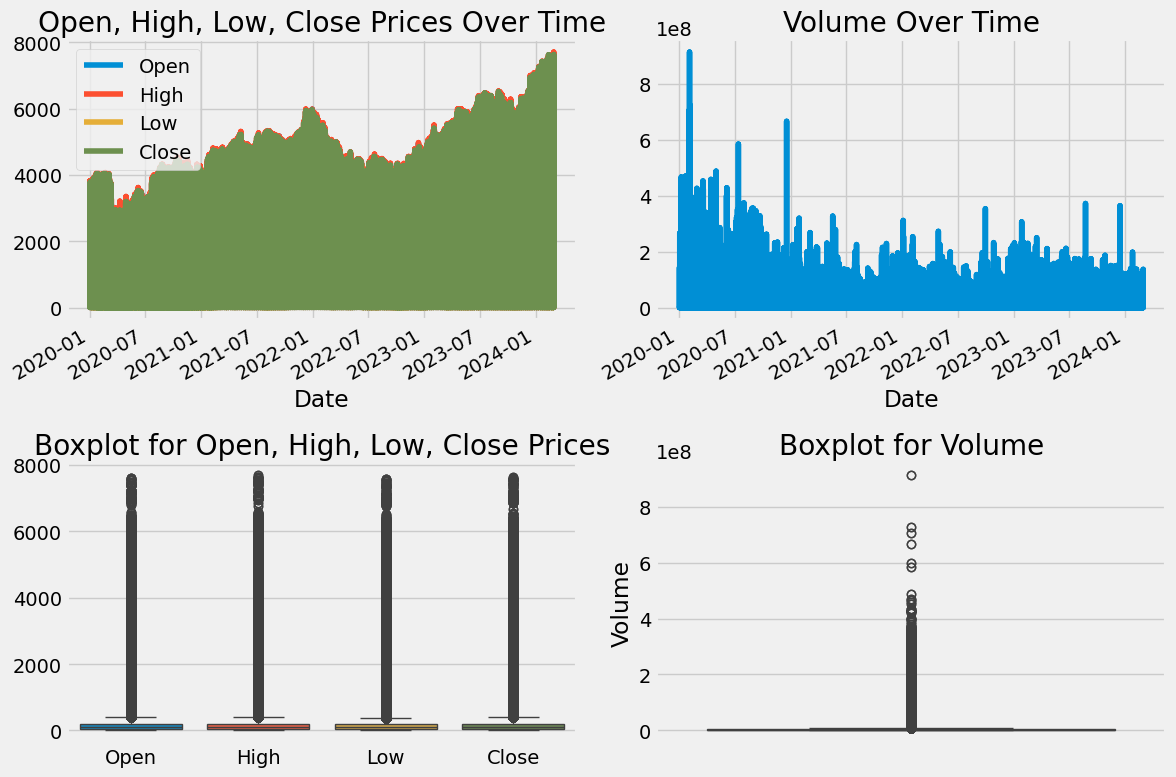

In [ ]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
combined_data[['Open', 'High', 'Low', 'Close']].plot(ax=axes[0, 0])
axes[0, 0].set_title('Open, High, Low, Close Prices Over Time')

# Plot Volume over time
combined_data['Volume'].plot(ax=axes[0, 1])
axes[0, 1].set_title('Volume Over Time')

# Boxplot for Open, High, Low, and Close Prices
sns.boxplot(data=combined_data[['Open', 'High', 'Low', 'Close']], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot for Open, High, Low, Close Prices')

# Boxplot for Volume
sns.boxplot(data=combined_data['Volume'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot for Volume')

# Adjust layout for better visibility
plt.tight_layout()

# Show the plots
plt.show()

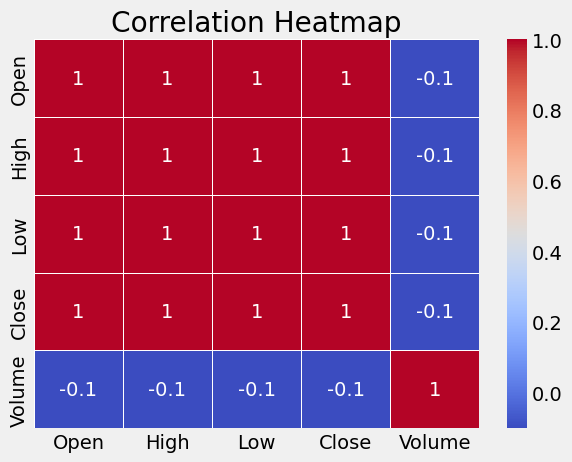

In [ ]:
# Compute the correlation matrix
corr_matrix = combined_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

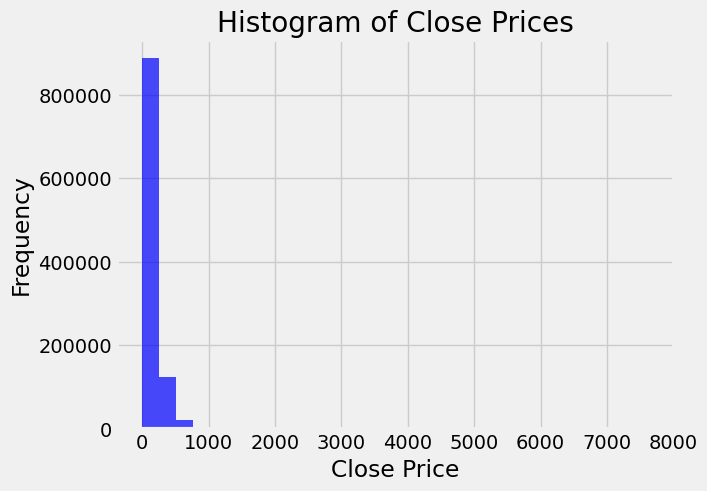

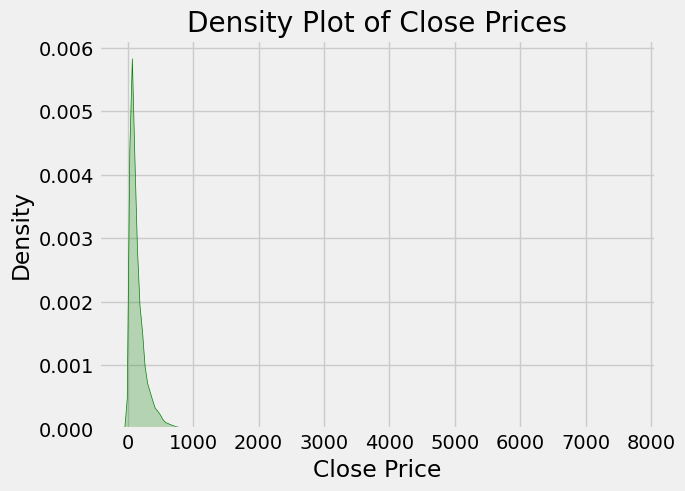

In [ ]:
# Create a histogram for 'close' prices
plt.hist(combined_data['Close'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Create a density plot for 'close' prices
sns.kdeplot(combined_data['Close'], fill=True, color='green')
plt.title('Density Plot of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.show()

#Fast EDA

DataFrame Head:


Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  177.679993  180.009995  177.139999  180.000000  149.672821   
2020-01-03  177.020004  178.660004  175.630005  178.449997  148.383957   
2020-01-06  177.149994  178.710007  176.350006  178.619995  148.525299   

             Volume Ticker       date  
Date                                   
2020-01-02  3601700    MMM 2020-01-02  
2020-01-03  2466900    MMM 2020-01-03  
2020-01-06  1998000    MMM 2020-01-06

DataFrame Tail:


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-02-27  197.649994  199.250000  194.039993  199.000000  199.000000   
2024-02-28  199.300003  200.500000  197.100006  199.940002  199.940002   
2024-02-29  200.500000  200.529999  198.190002  198.330002  198.330002   

             Volume    Ticker       date  
Date                                      
2024-02-27  1982500  combined 2024-02-27  
2024-02-28  2003300  combined 2024-02-28  
2024-02-29  2849200  combined 2024-02-29

----------------------------------------------------------------------------------------------------
Missing values:


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(1046502, 8)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1046502 entries, 2020-01-02 to 2024-02-29
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Open       1046502 non-null  float64       
 1   High       1046502 non-null  float64       
 2   Low        1046502 non-null  float64       
 3   Close      1046502 non-null  float64       
 4   Adj Close  1046502 non-null  float64       
 5   Volume     1046502 non-null  int64         
 6   Ticker     1046502 non-null  object        
 7   date       1046502 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 71.9+ MB
-----------------------------------------------

----------------------------------------------------------------------------------------------------
DataFrame Correlation:



/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:124: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.3f')


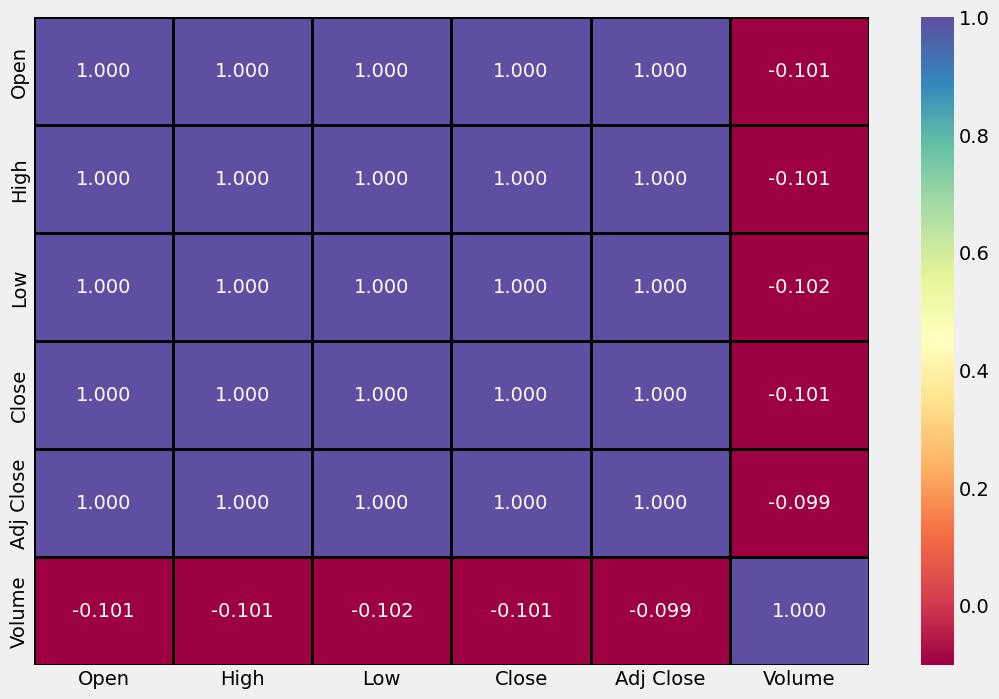

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



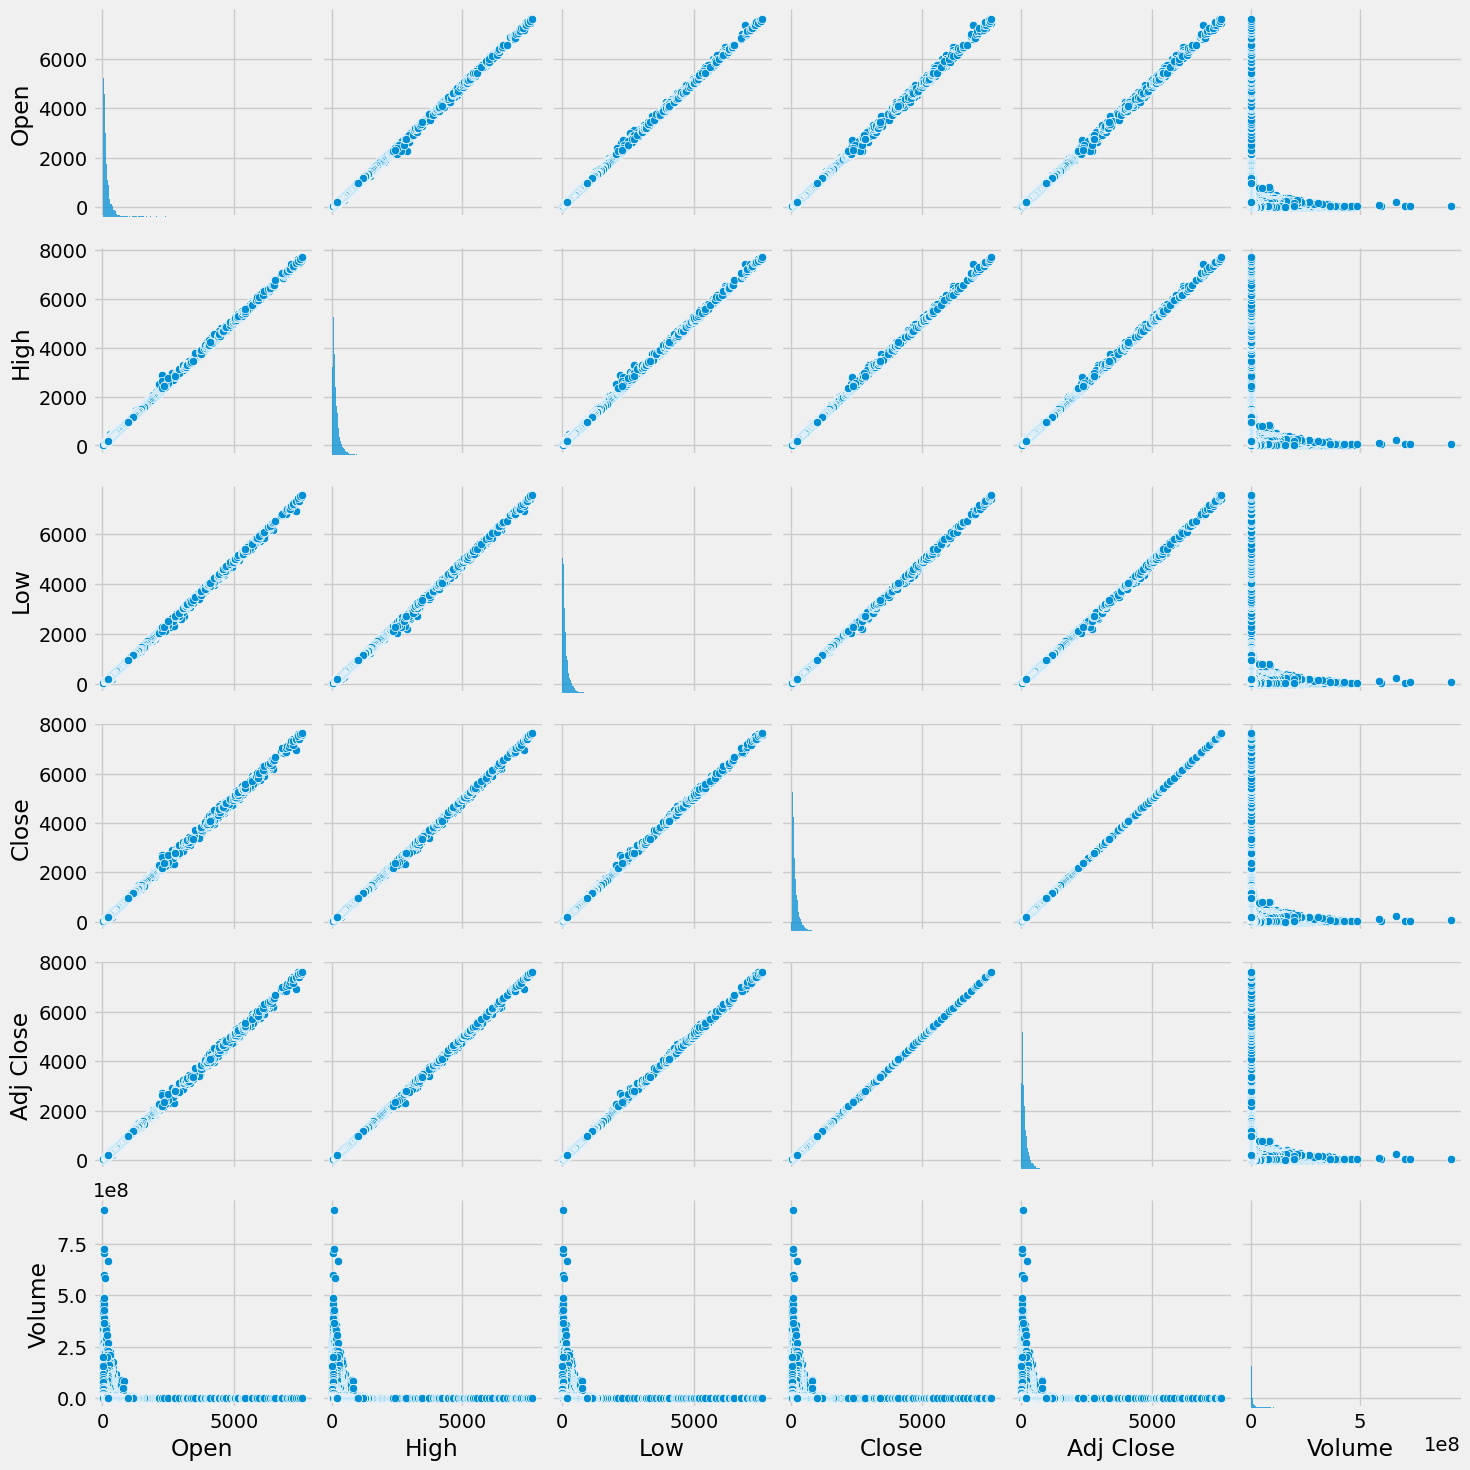

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



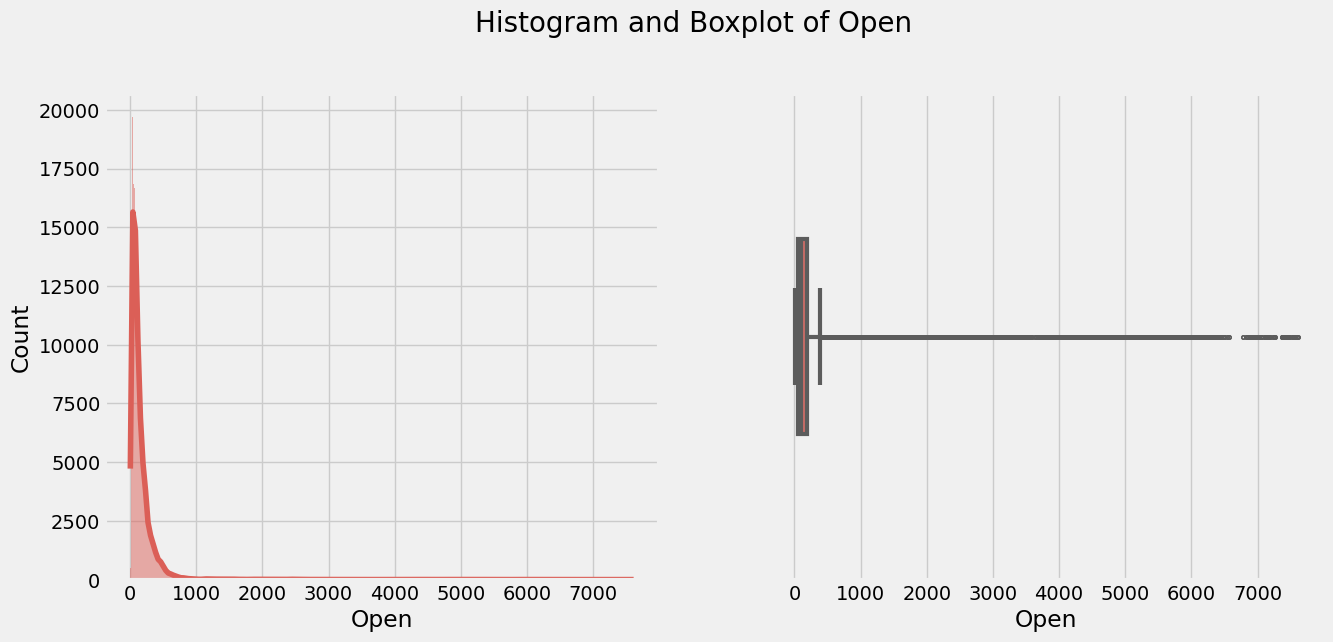

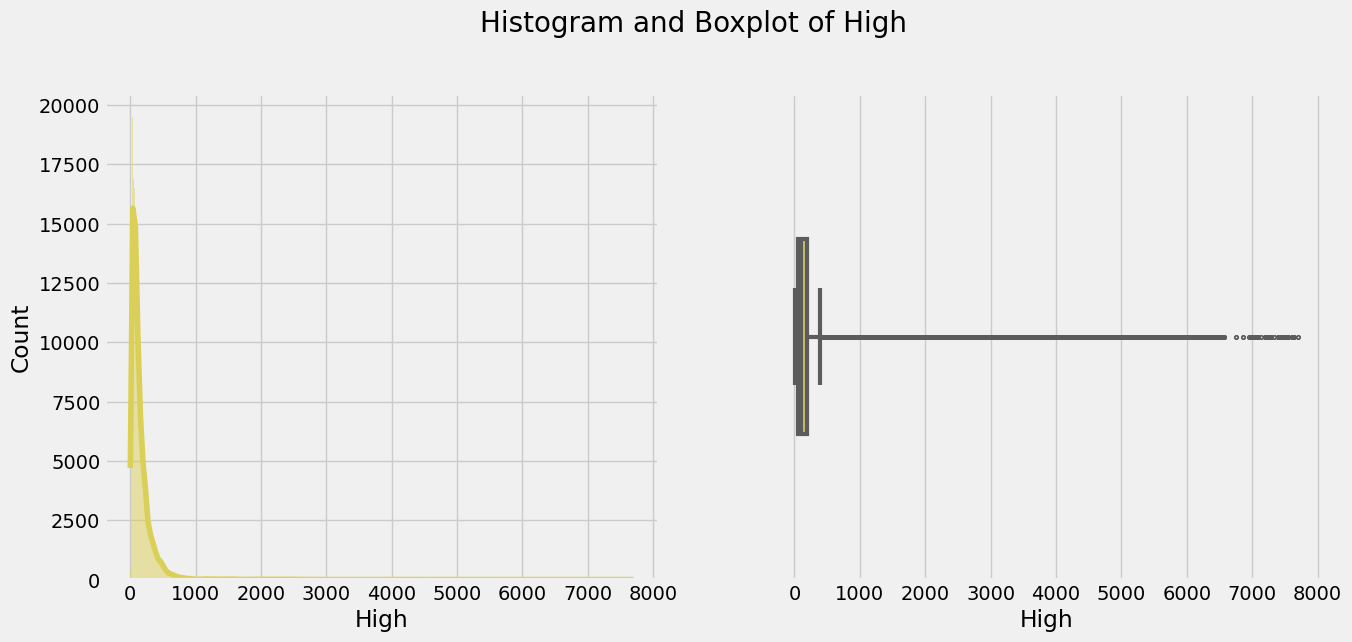

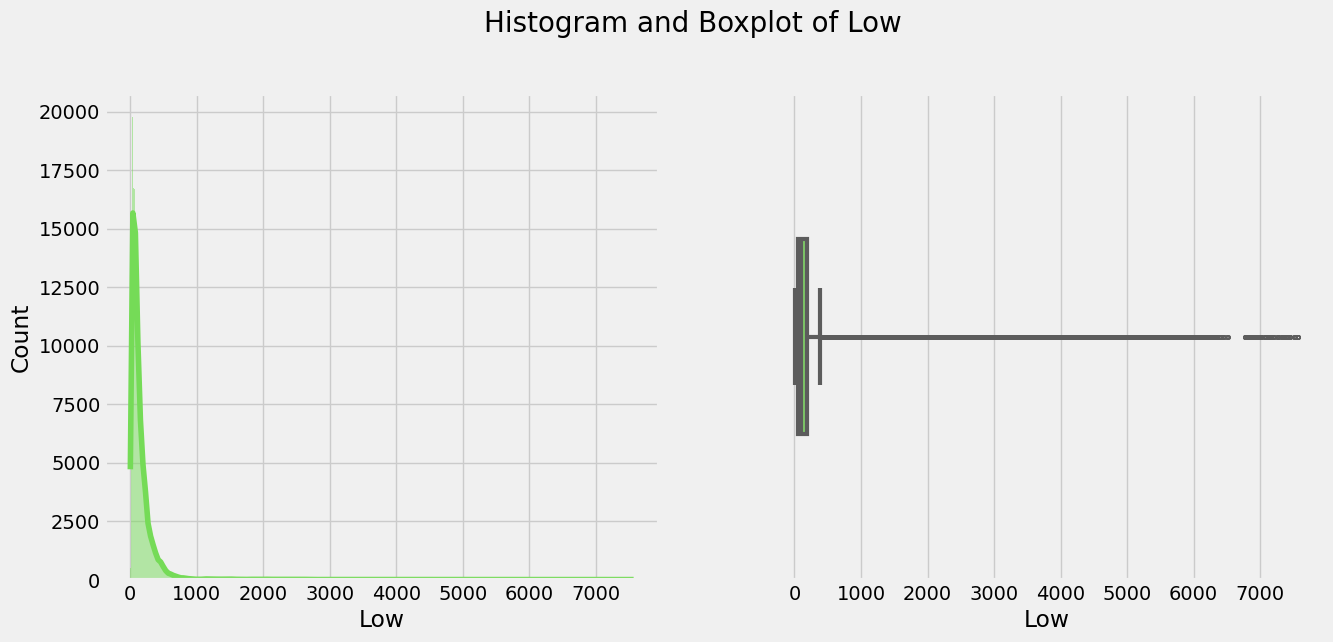

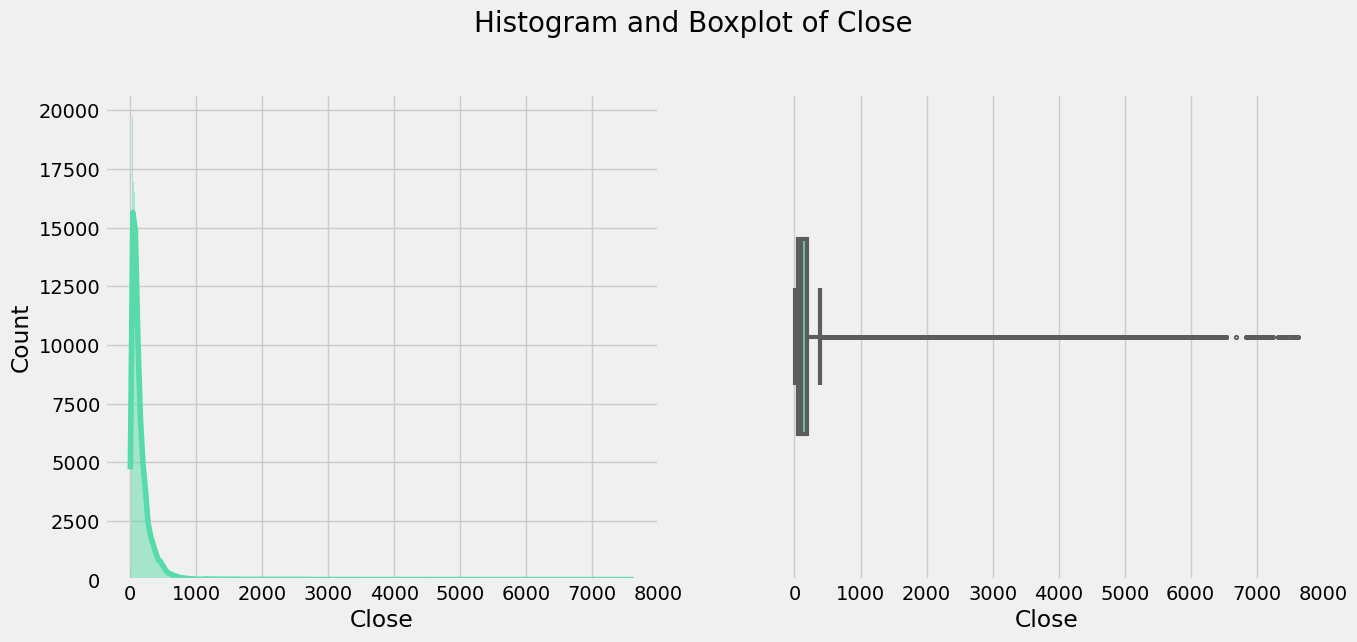

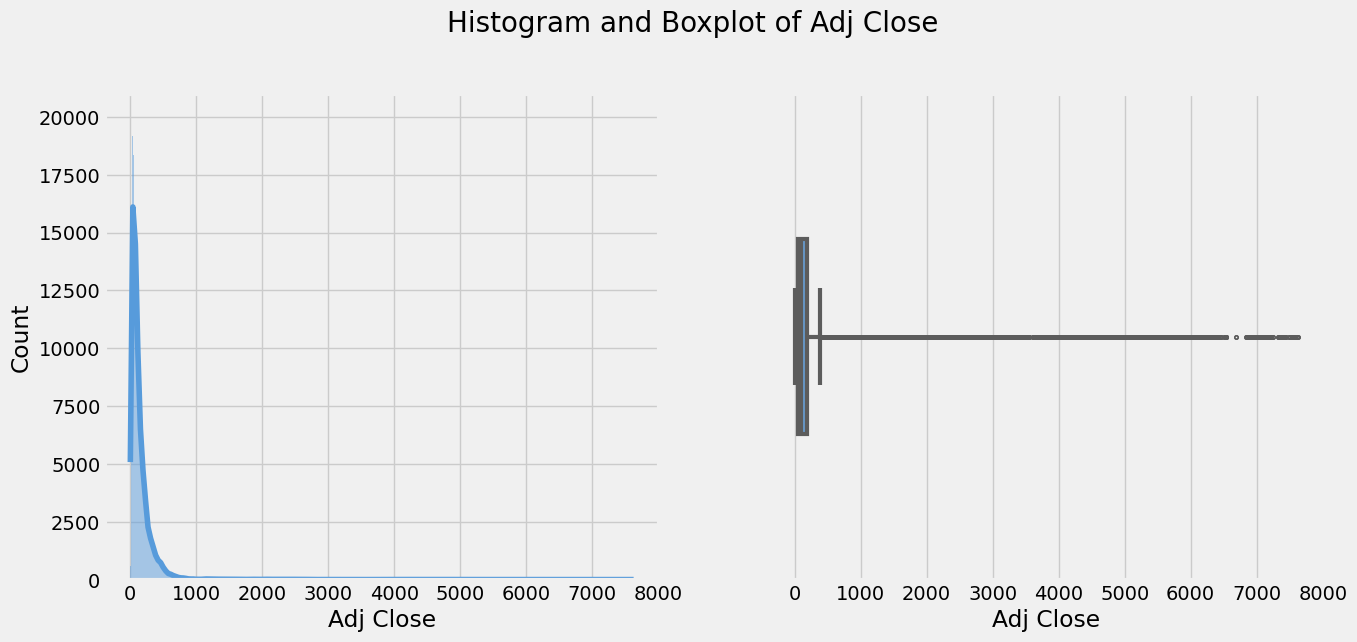

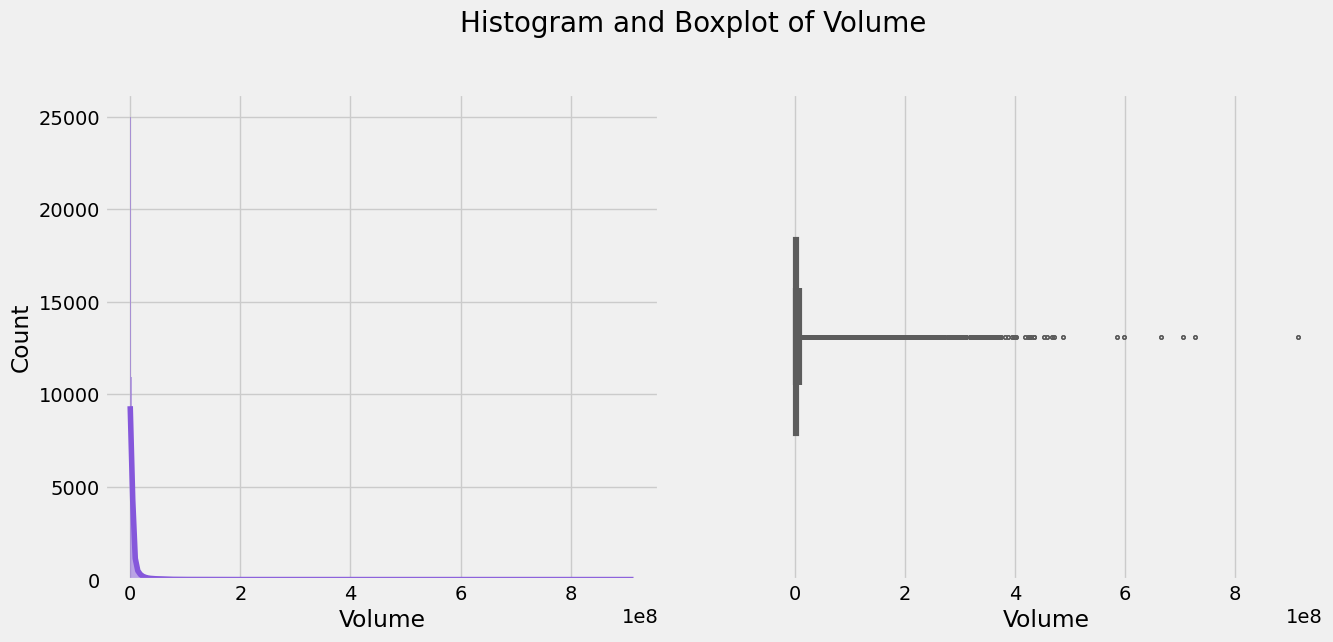

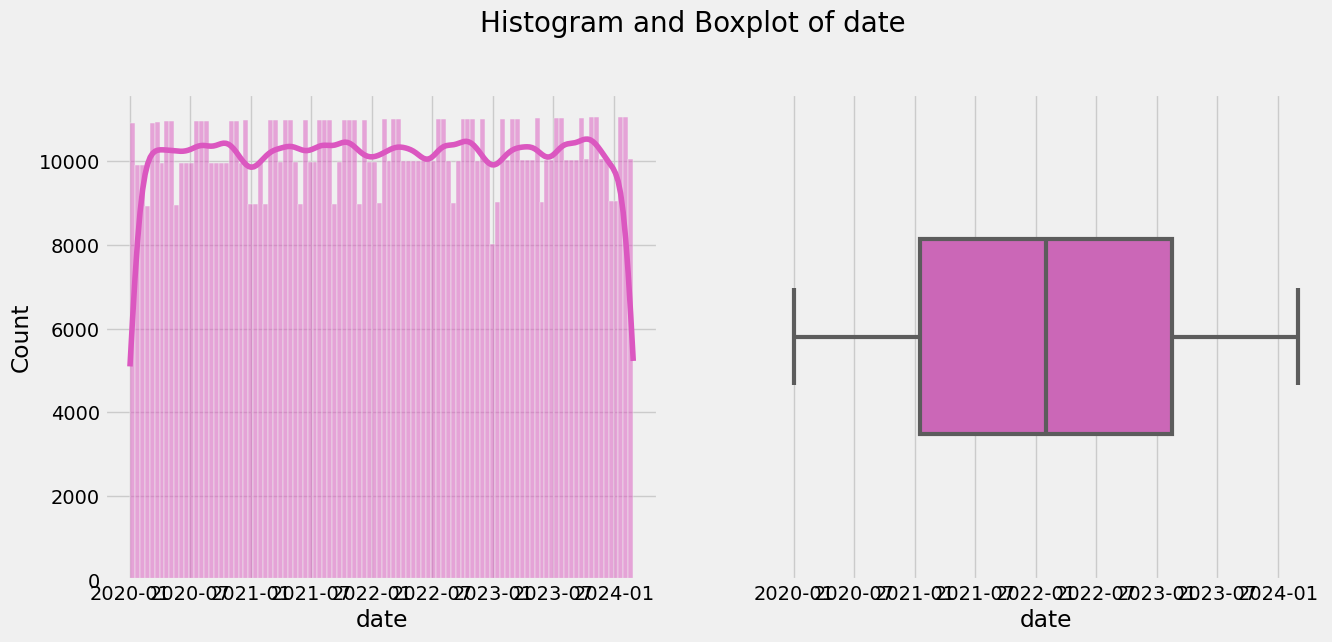

In [ ]:
fast_eda(combined_data)

# Time Series Visualization



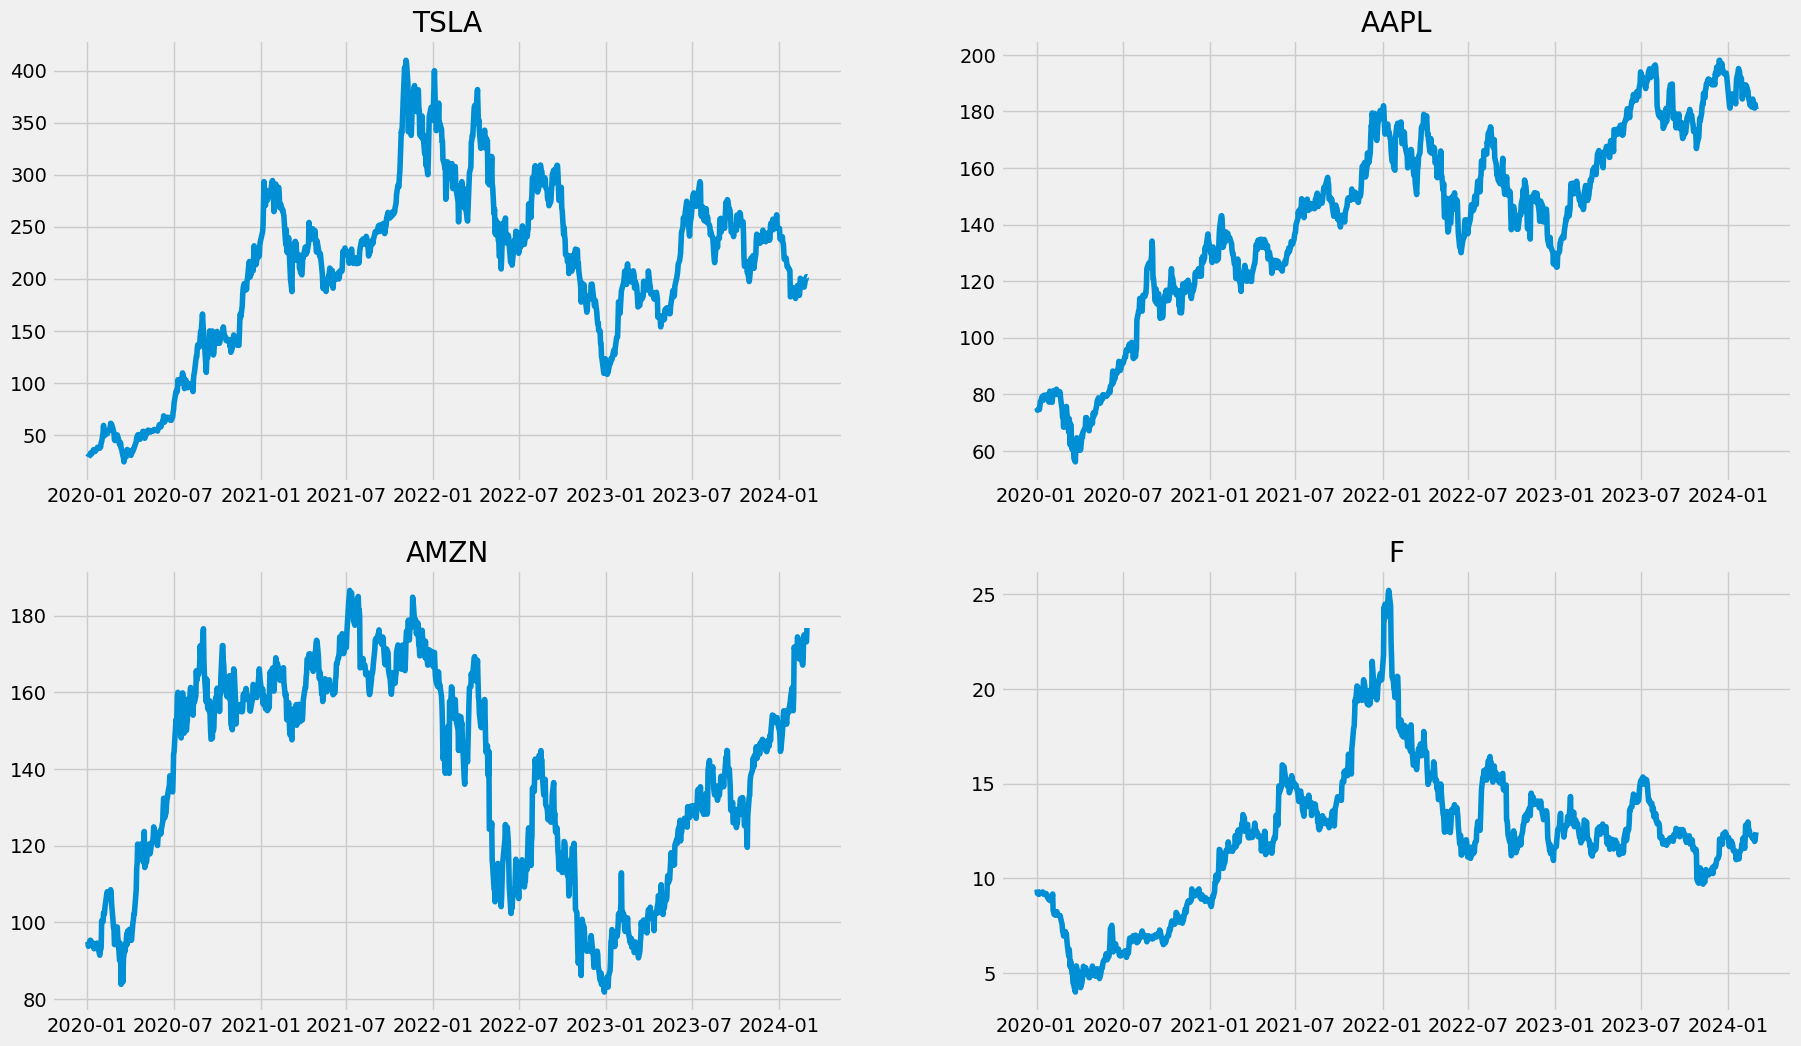

In [ ]:
# Time Series of sortlisted stocks for Close
plt.figure(figsize=(20,12))
for i, company in enumerate(stock_list,1):
    plt.subplot(2, 2, i)
    df=combined_data[combined_data['Ticker']==company]
    plt.plot(df['date'],df['Close'])
    plt.title(company)

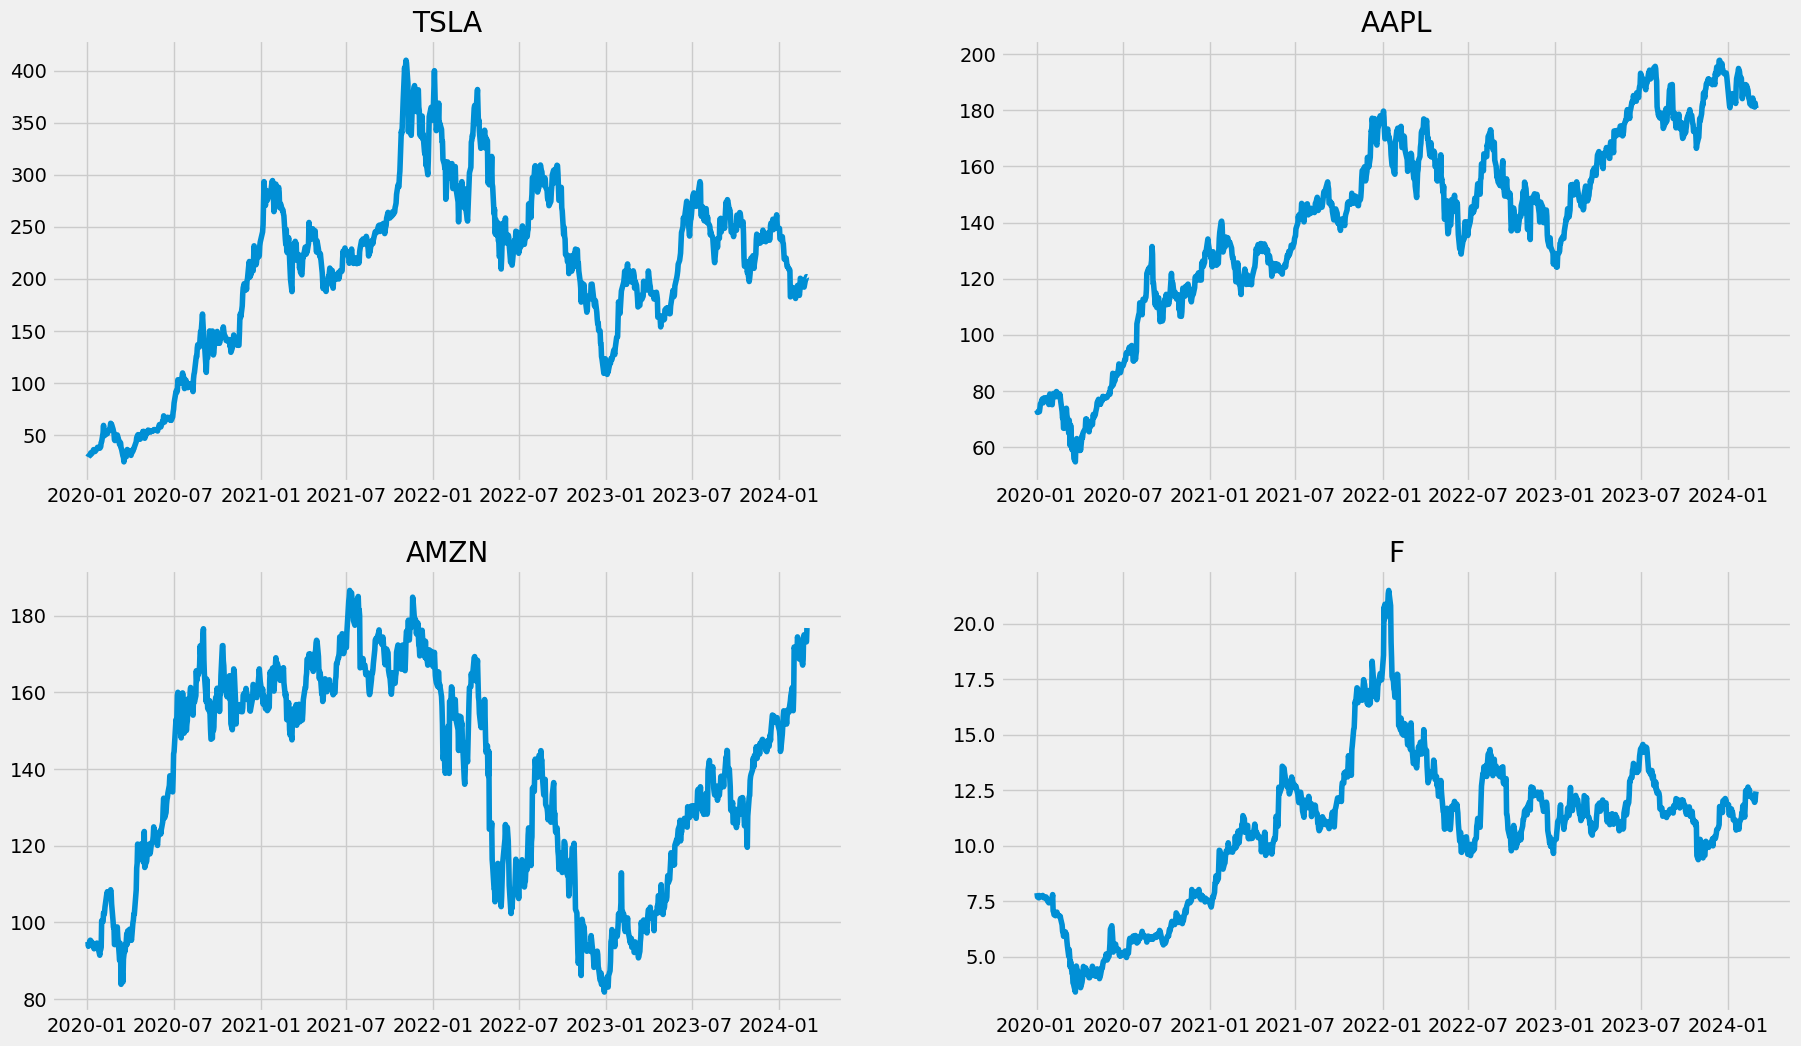

In [ ]:
# Time Series of sortlisted stocks for Adj Close
plt.figure(figsize=(20,12))
for i, company in enumerate(stock_list,1):
    plt.subplot(2, 2, i)
    df=combined_data[combined_data['Ticker']==company]
    plt.plot(df['date'],df['Adj Close'])
    plt.title(company)

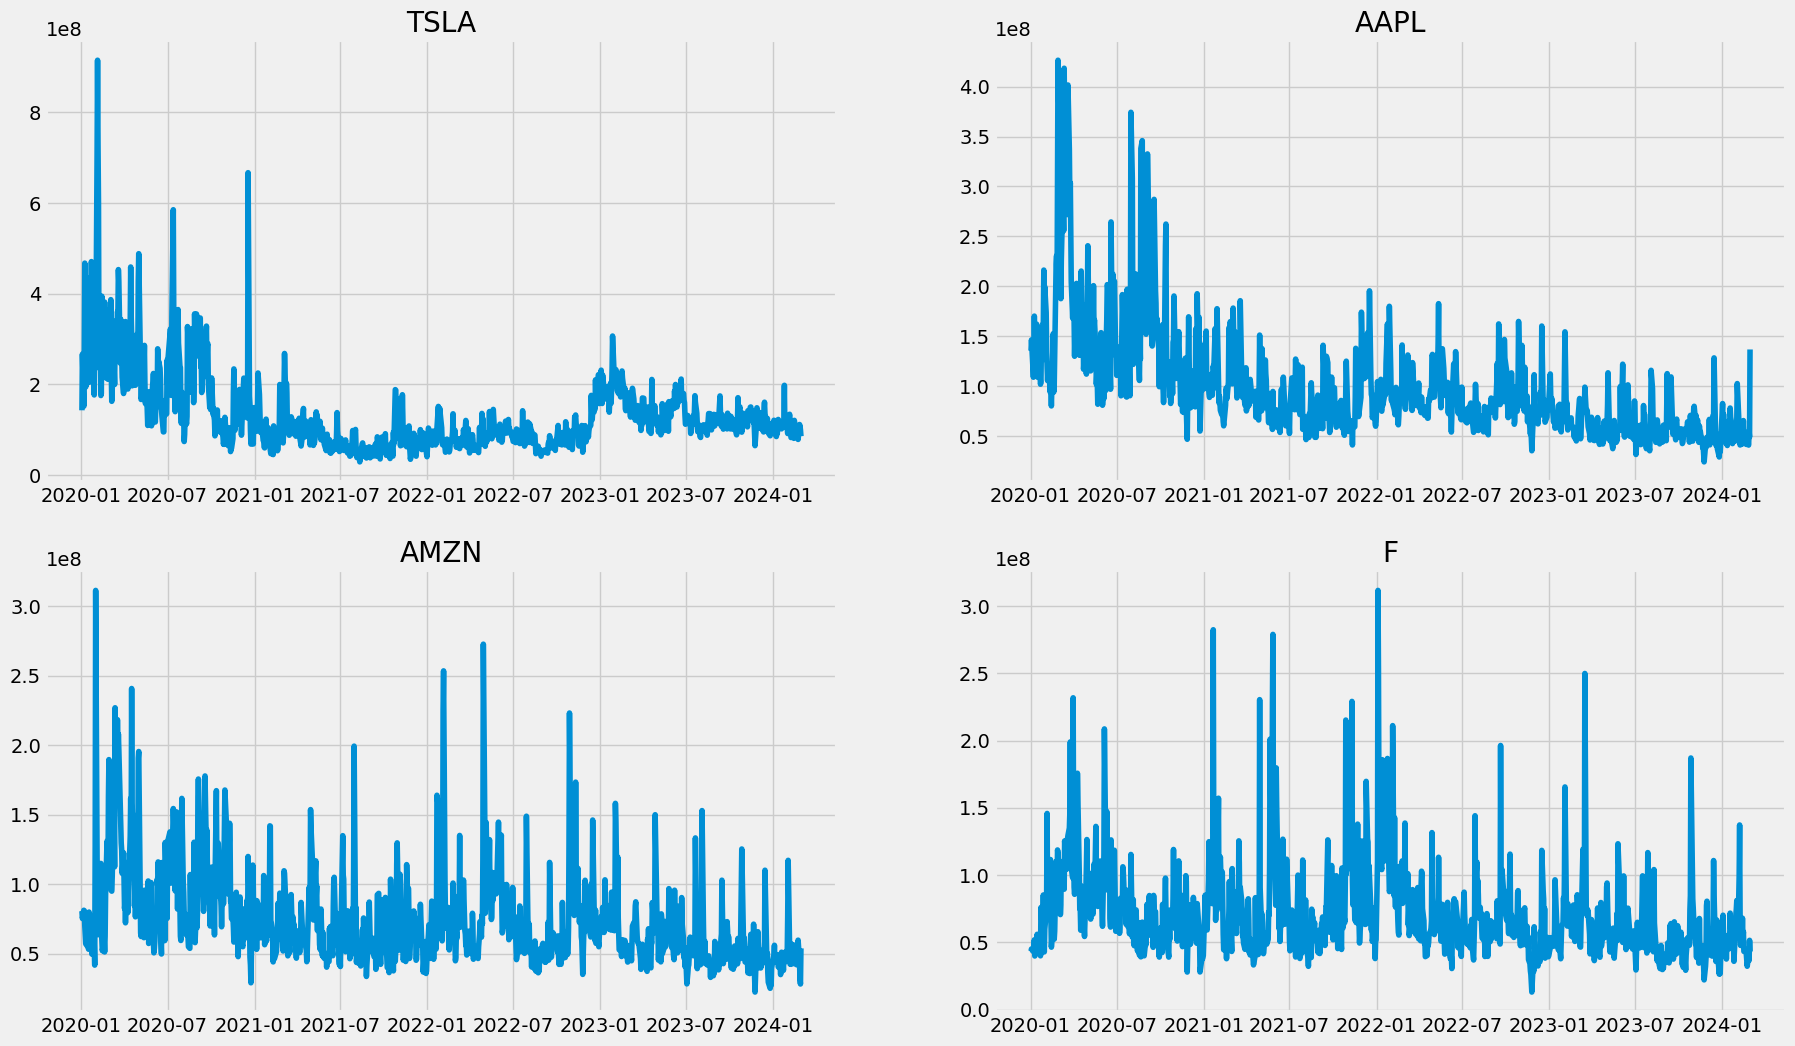

In [ ]:
## Time Series of sortlisted stocks for Volume
plt.figure(figsize=(20,12))
for i, company in enumerate(stock_list,1):
    plt.subplot(2, 2, i)
    df=combined_data[combined_data['Ticker']==company]
    plt.plot(df['date'],df['Volume'])
    plt.title(company)

In [ ]:
# Time Series of sortlisted stocks for Volume using Ploty dark
for company in (stock_list):
    df=combined_data[combined_data['Ticker']==company]
    fig = px.line(df, x="date", y="Volume", title=company,template = 'plotly_dark')
    fig.show()


In [ ]:
# Filter combined data for selected stocks
tesla_data = combined_data[combined_data['Ticker'] == 'TSLA']
apple_data = combined_data[combined_data['Ticker'] == 'AAPL']
amazon_data = combined_data[combined_data['Ticker'] == 'AMZN']
ford_data = combined_data[combined_data['Ticker'] == 'F']
print("Tesla Data:")
print(tesla_data.head())


Tesla Data:
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500   
2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500   
2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000   
2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500   
2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500   

           Ticker       date  
Date                          
2020-01-02   TSLA 2020-01-02  
2020-01-03   TSLA 2020-01-03  
2020-01-06   TSLA 2020-01-06  
2020-01-07   TSLA 2020-01-07  
2020-01-08   TSLA 2020-01-08  


In [ ]:
close=pd.DataFrame()

In [ ]:
close['Tesla']=tesla_data['Close']
close['Apple']=apple_data['Close']
close['Amazon']=amazon_data['Close']
close['Ford']=ford_data['Close']

In [ ]:
close.head()

Tesla      Apple     Amazon  Ford
Date                                             
2020-01-02  28.684000  75.087502  94.900497  9.42
2020-01-03  29.534000  74.357498  93.748497  9.21
2020-01-06  30.102667  74.949997  95.143997  9.16
2020-01-07  31.270666  74.597504  95.343002  9.25
2020-01-08  32.809334  75.797501  94.598503  9.25

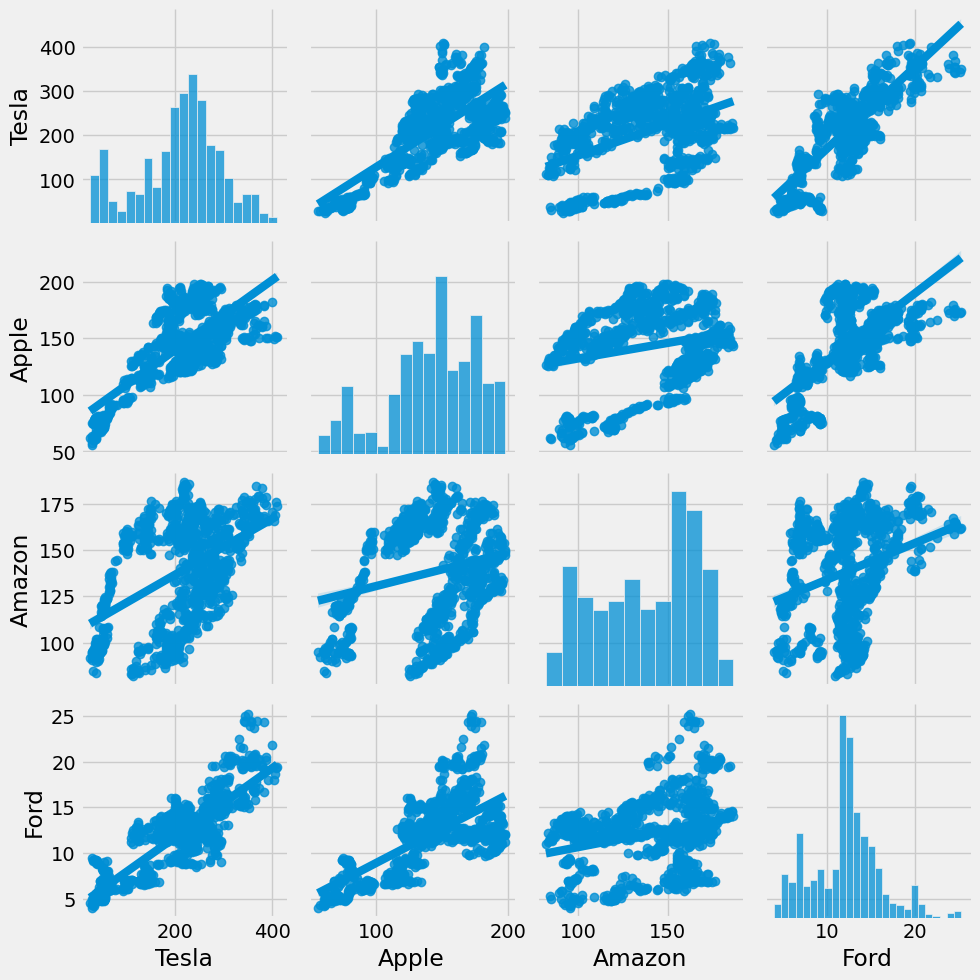

In [ ]:
#sns.pairplot(data=close)
sns.pairplot(close, kind='reg')

<Axes: >

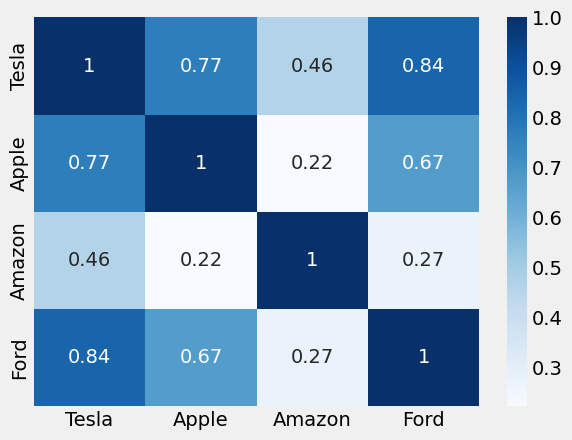

In [ ]:
sns.heatmap(close.corr(),annot=True,cmap='Blues',linecolor="black")

Above we can see all the relationships on daily returns between all 4 stocks. A quick glance shows an interesting correlation between Ford and Tesla. It might be interesting to investigate that individual comaprison.



In [ ]:

# Calculate the 90-day moving average for each stock
moving_avg_90 = close.rolling(window=90).mean()

# Calculate the 180-day moving average for each stock
moving_avg_180 = close.rolling(window=180).mean()

# Display the moving averages
print("90-Day Moving Average:")
print(moving_avg_90.tail())  # Display the last few rows

print("\n180-Day Moving Average:")
print(moving_avg_180.tail())  # Display the last few rows


90-Day Moving Average:
                 Tesla       Apple      Amazon       Ford
Date                                                     
2024-02-23  222.086556  186.390667  149.913666  11.343222
2024-02-26  221.480778  186.417778  150.382333  11.343445
2024-02-27  220.868333  186.478667  150.849777  11.343000
2024-02-28  220.416778  186.540667  151.350111  11.349111
2024-02-29  220.214222  186.599444  151.887444  11.359222

180-Day Moving Average:
                 Tesla       Apple      Amazon       Ford
Date                                                     
2024-02-23  239.191944  184.708000  140.976611  12.228944
2024-02-26  239.052111  184.726556  141.273833  12.219833
2024-02-27  238.856944  184.738000  141.547667  12.211056
2024-02-28  238.621611  184.740556  141.823945  12.203056
2024-02-29  238.355222  184.723667  142.102778  12.195611


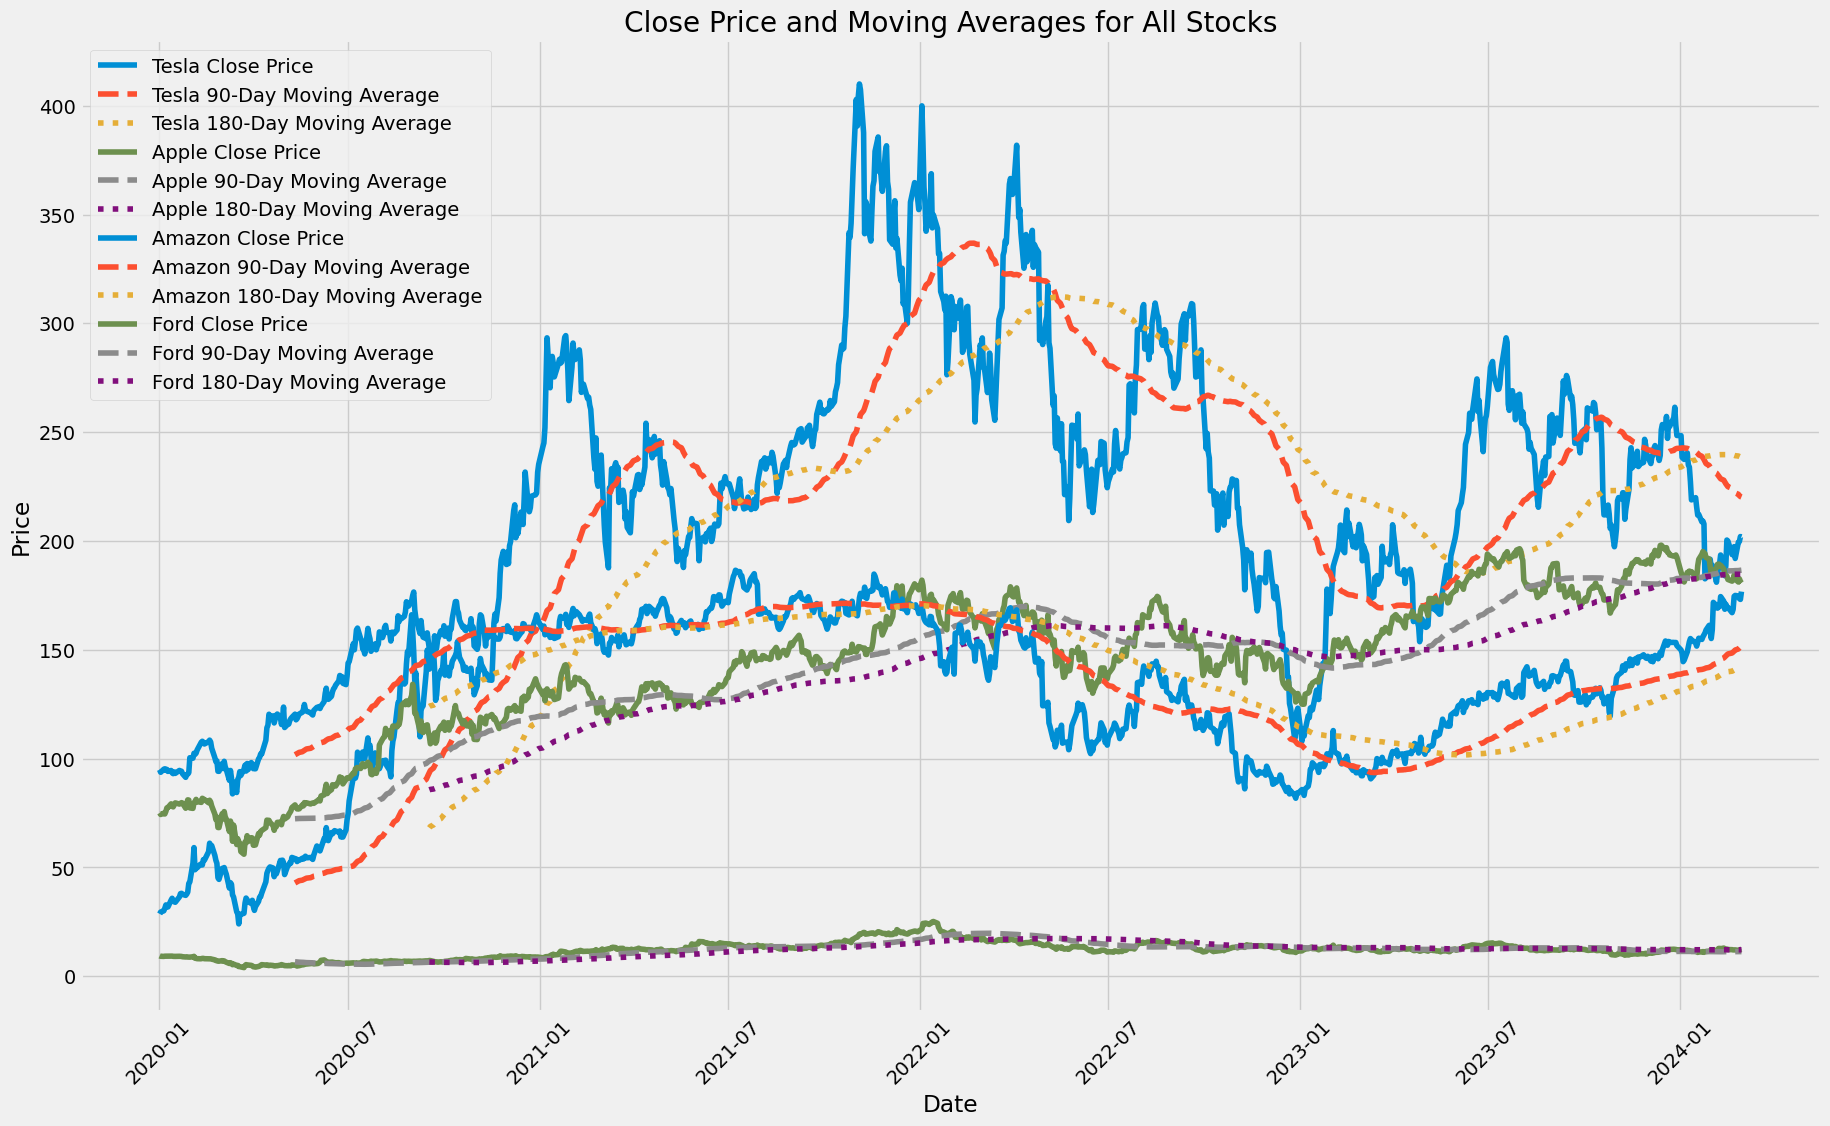

In [ ]:
# Plotting
plt.figure(figsize=(20, 12))

for stock in close.columns:
    plt.plot(close.index, close[stock], label=f'{stock} Close Price')
    plt.plot(close.index, moving_avg_90[stock], label=f'{stock} 90-Day Moving Average', linestyle='--')
    plt.plot(close.index, moving_avg_180[stock], label=f'{stock} 180-Day Moving Average', linestyle=':')

plt.title('Close Price and Moving Averages for All Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


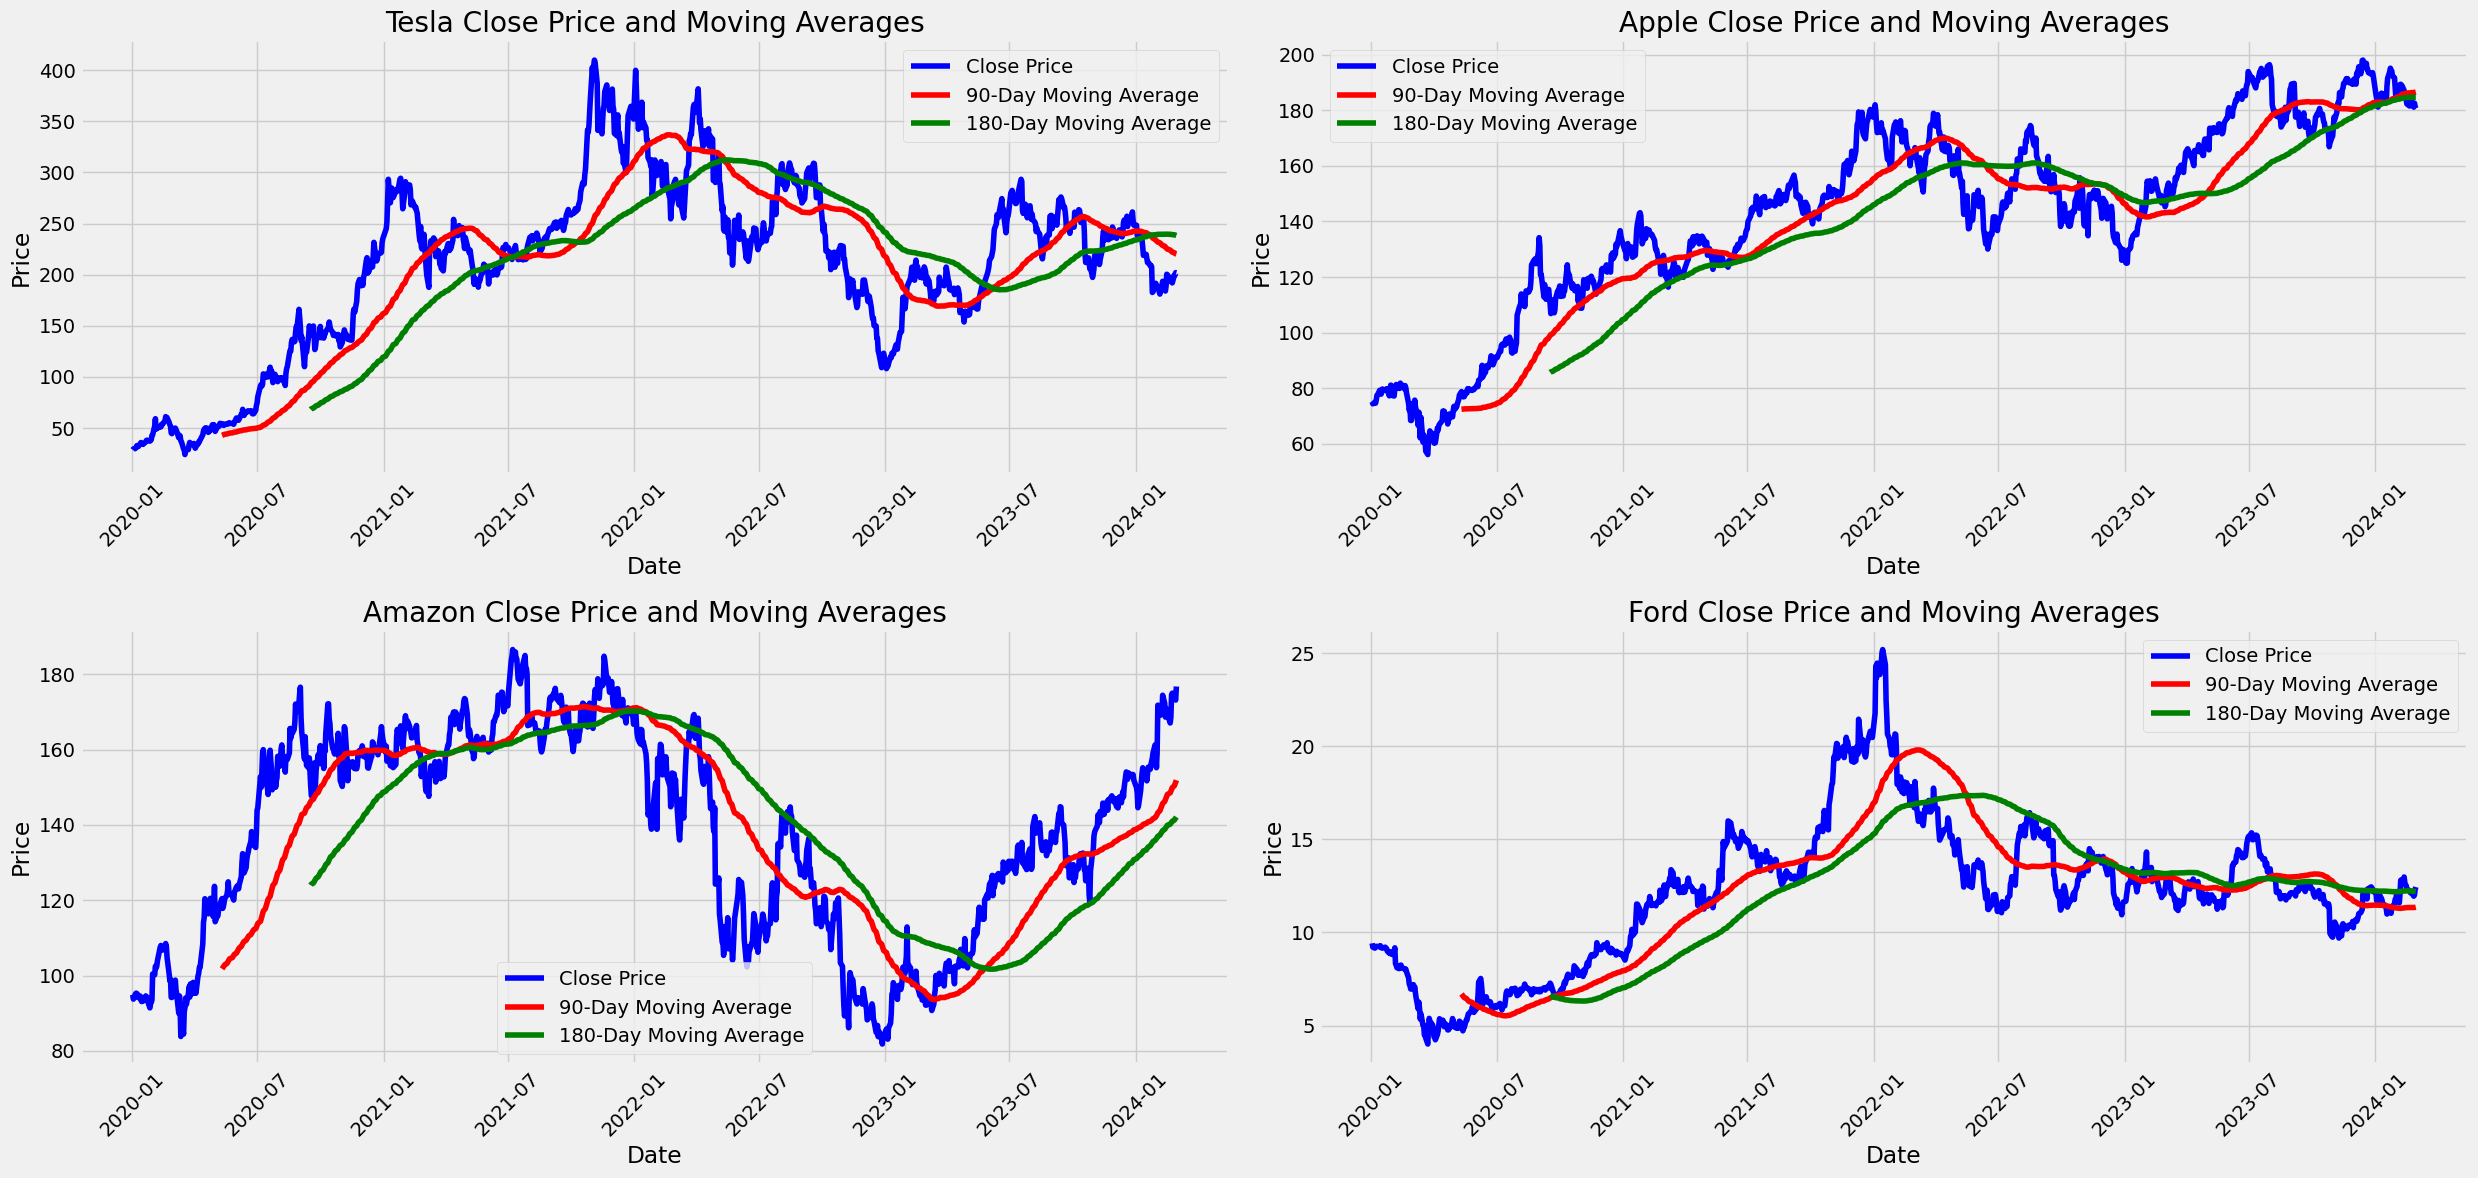

In [ ]:
# Determine the number of subplots needed
num_plots = len(close.columns)
num_rows = 2
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(25, 12))
axs = axs.flatten()
for i, stock in enumerate(close.columns):
    axs[i].plot(close.index, close[stock], label='Close Price', color='blue')
    axs[i].plot(close.index, moving_avg_90[stock], label='90-Day Moving Average', color='red')
    axs[i].plot(close.index, moving_avg_180[stock], label='180-Day Moving Average', color='green')
    axs[i].set_title(f'{stock} Close Price and Moving Averages')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].legend()
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)
plt.tight_layout()
plt.show()

# Time Series Decomposition

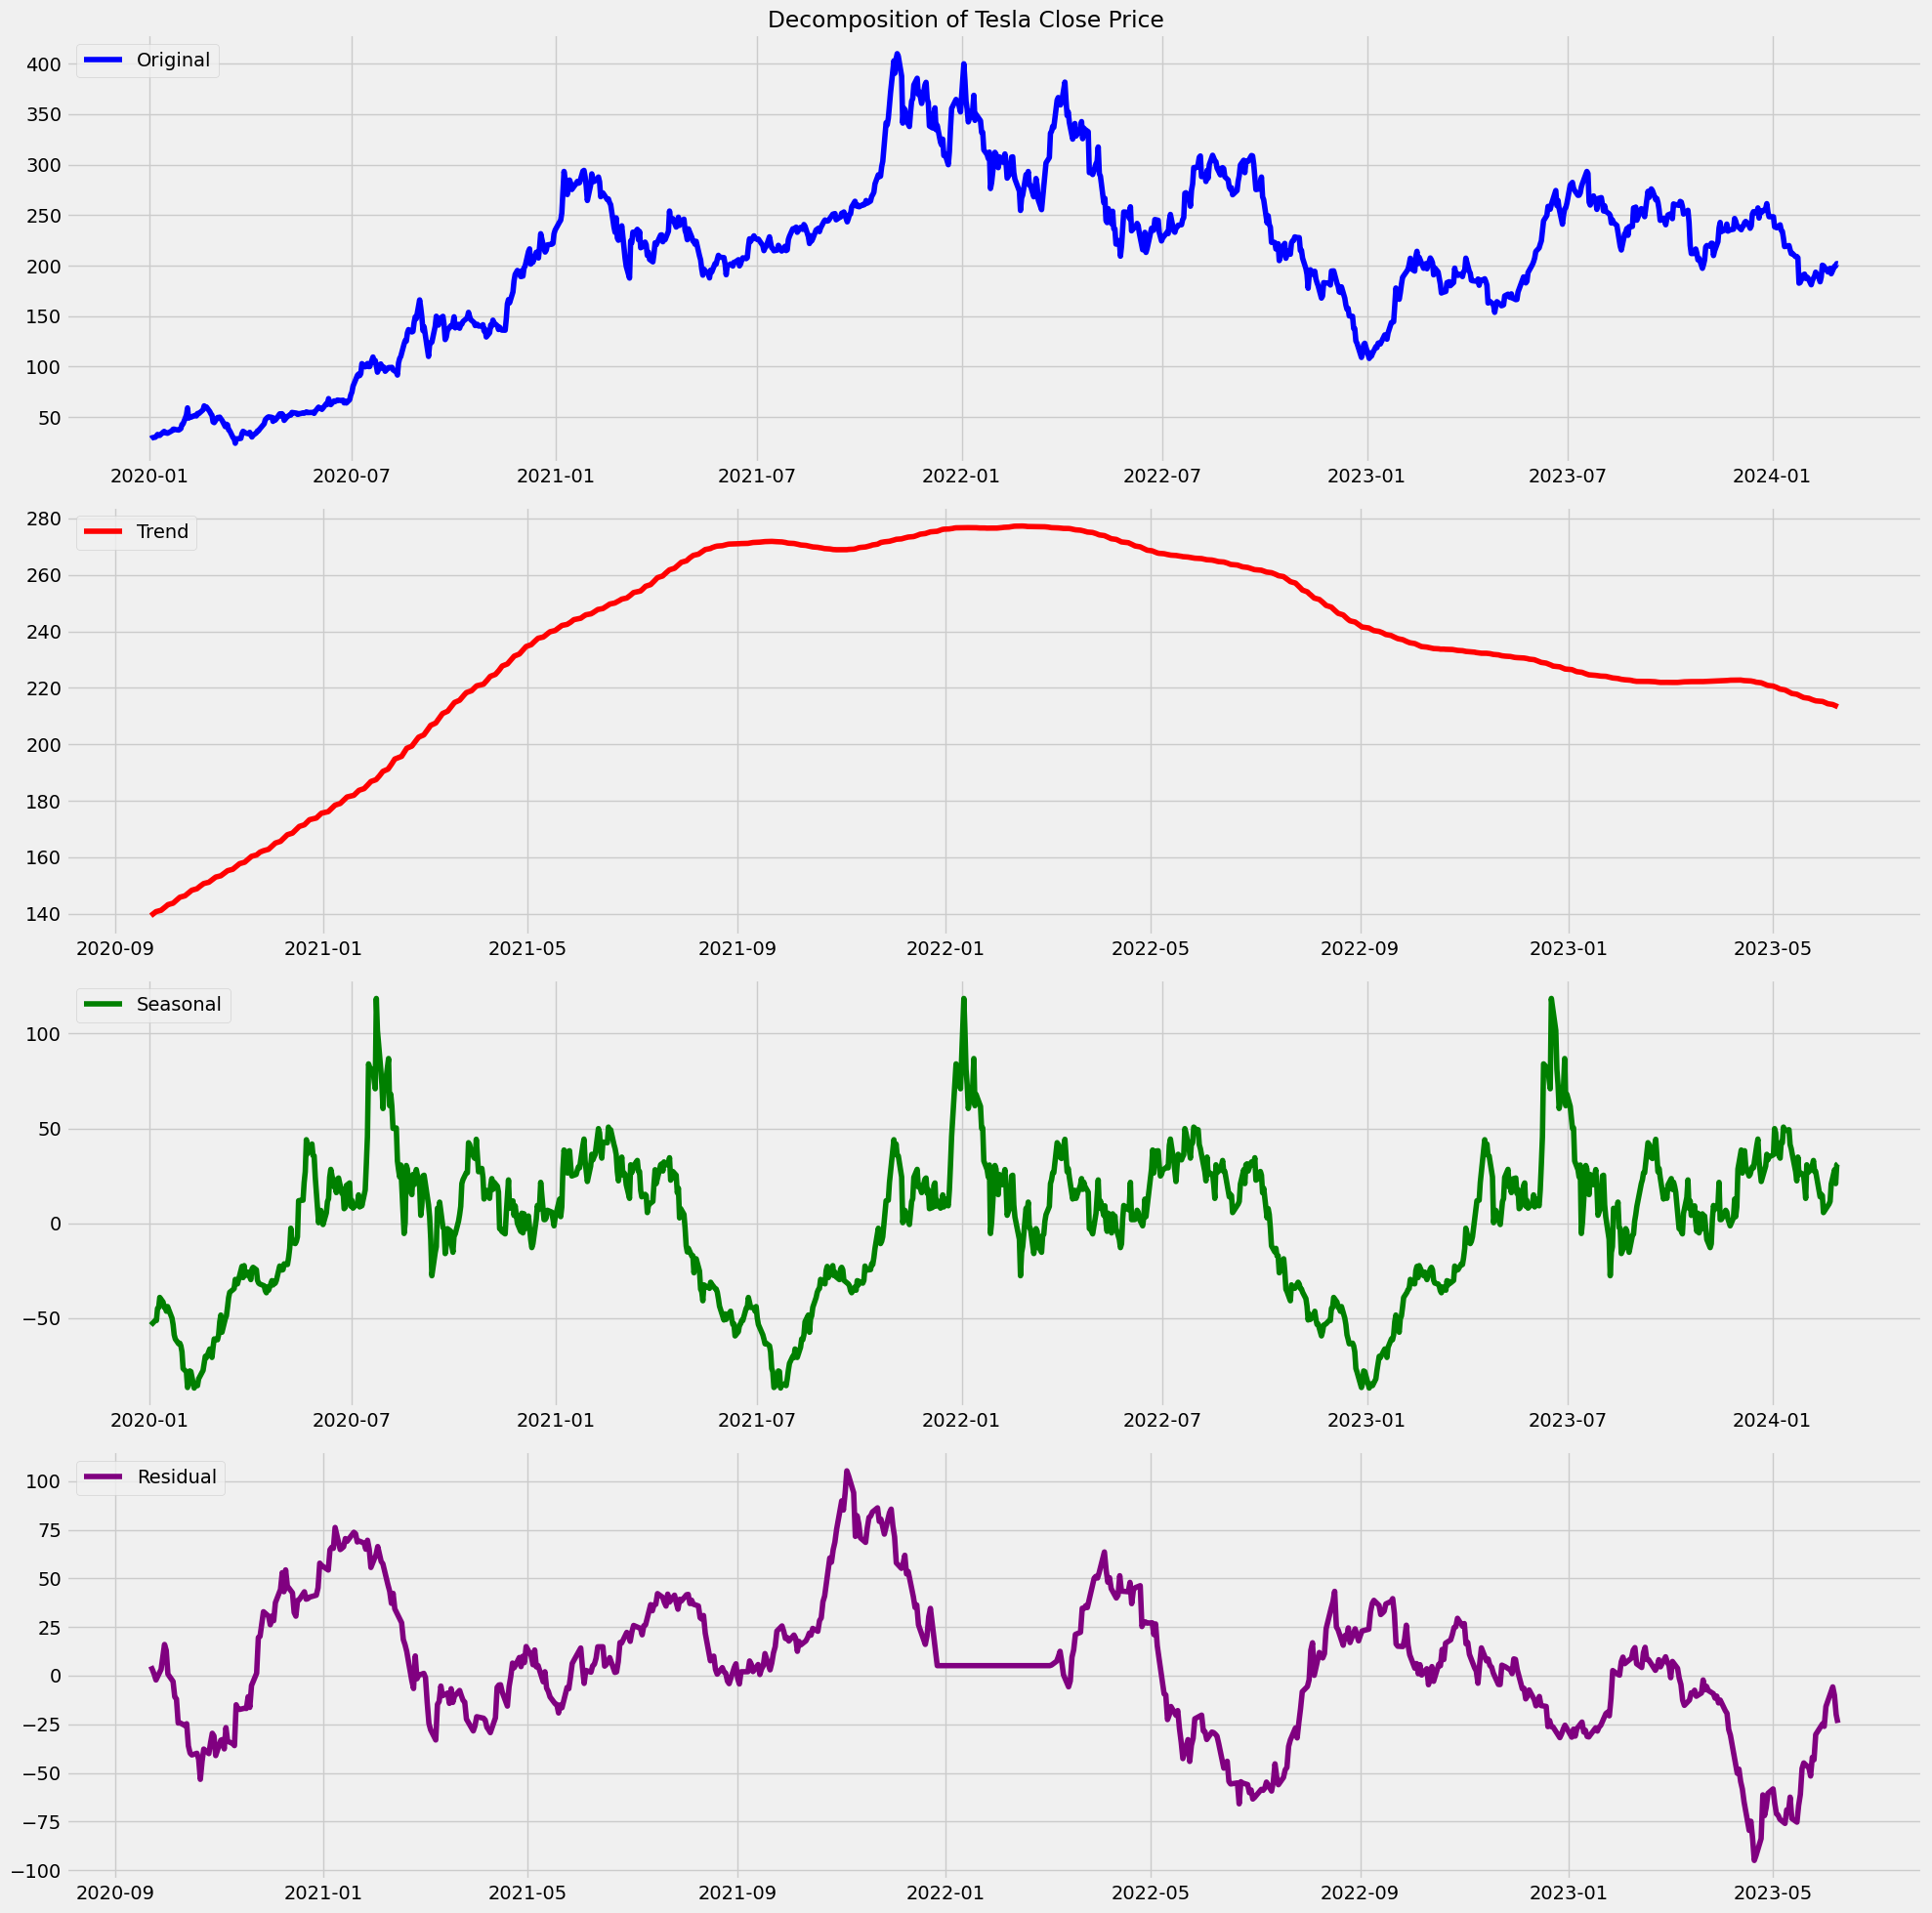

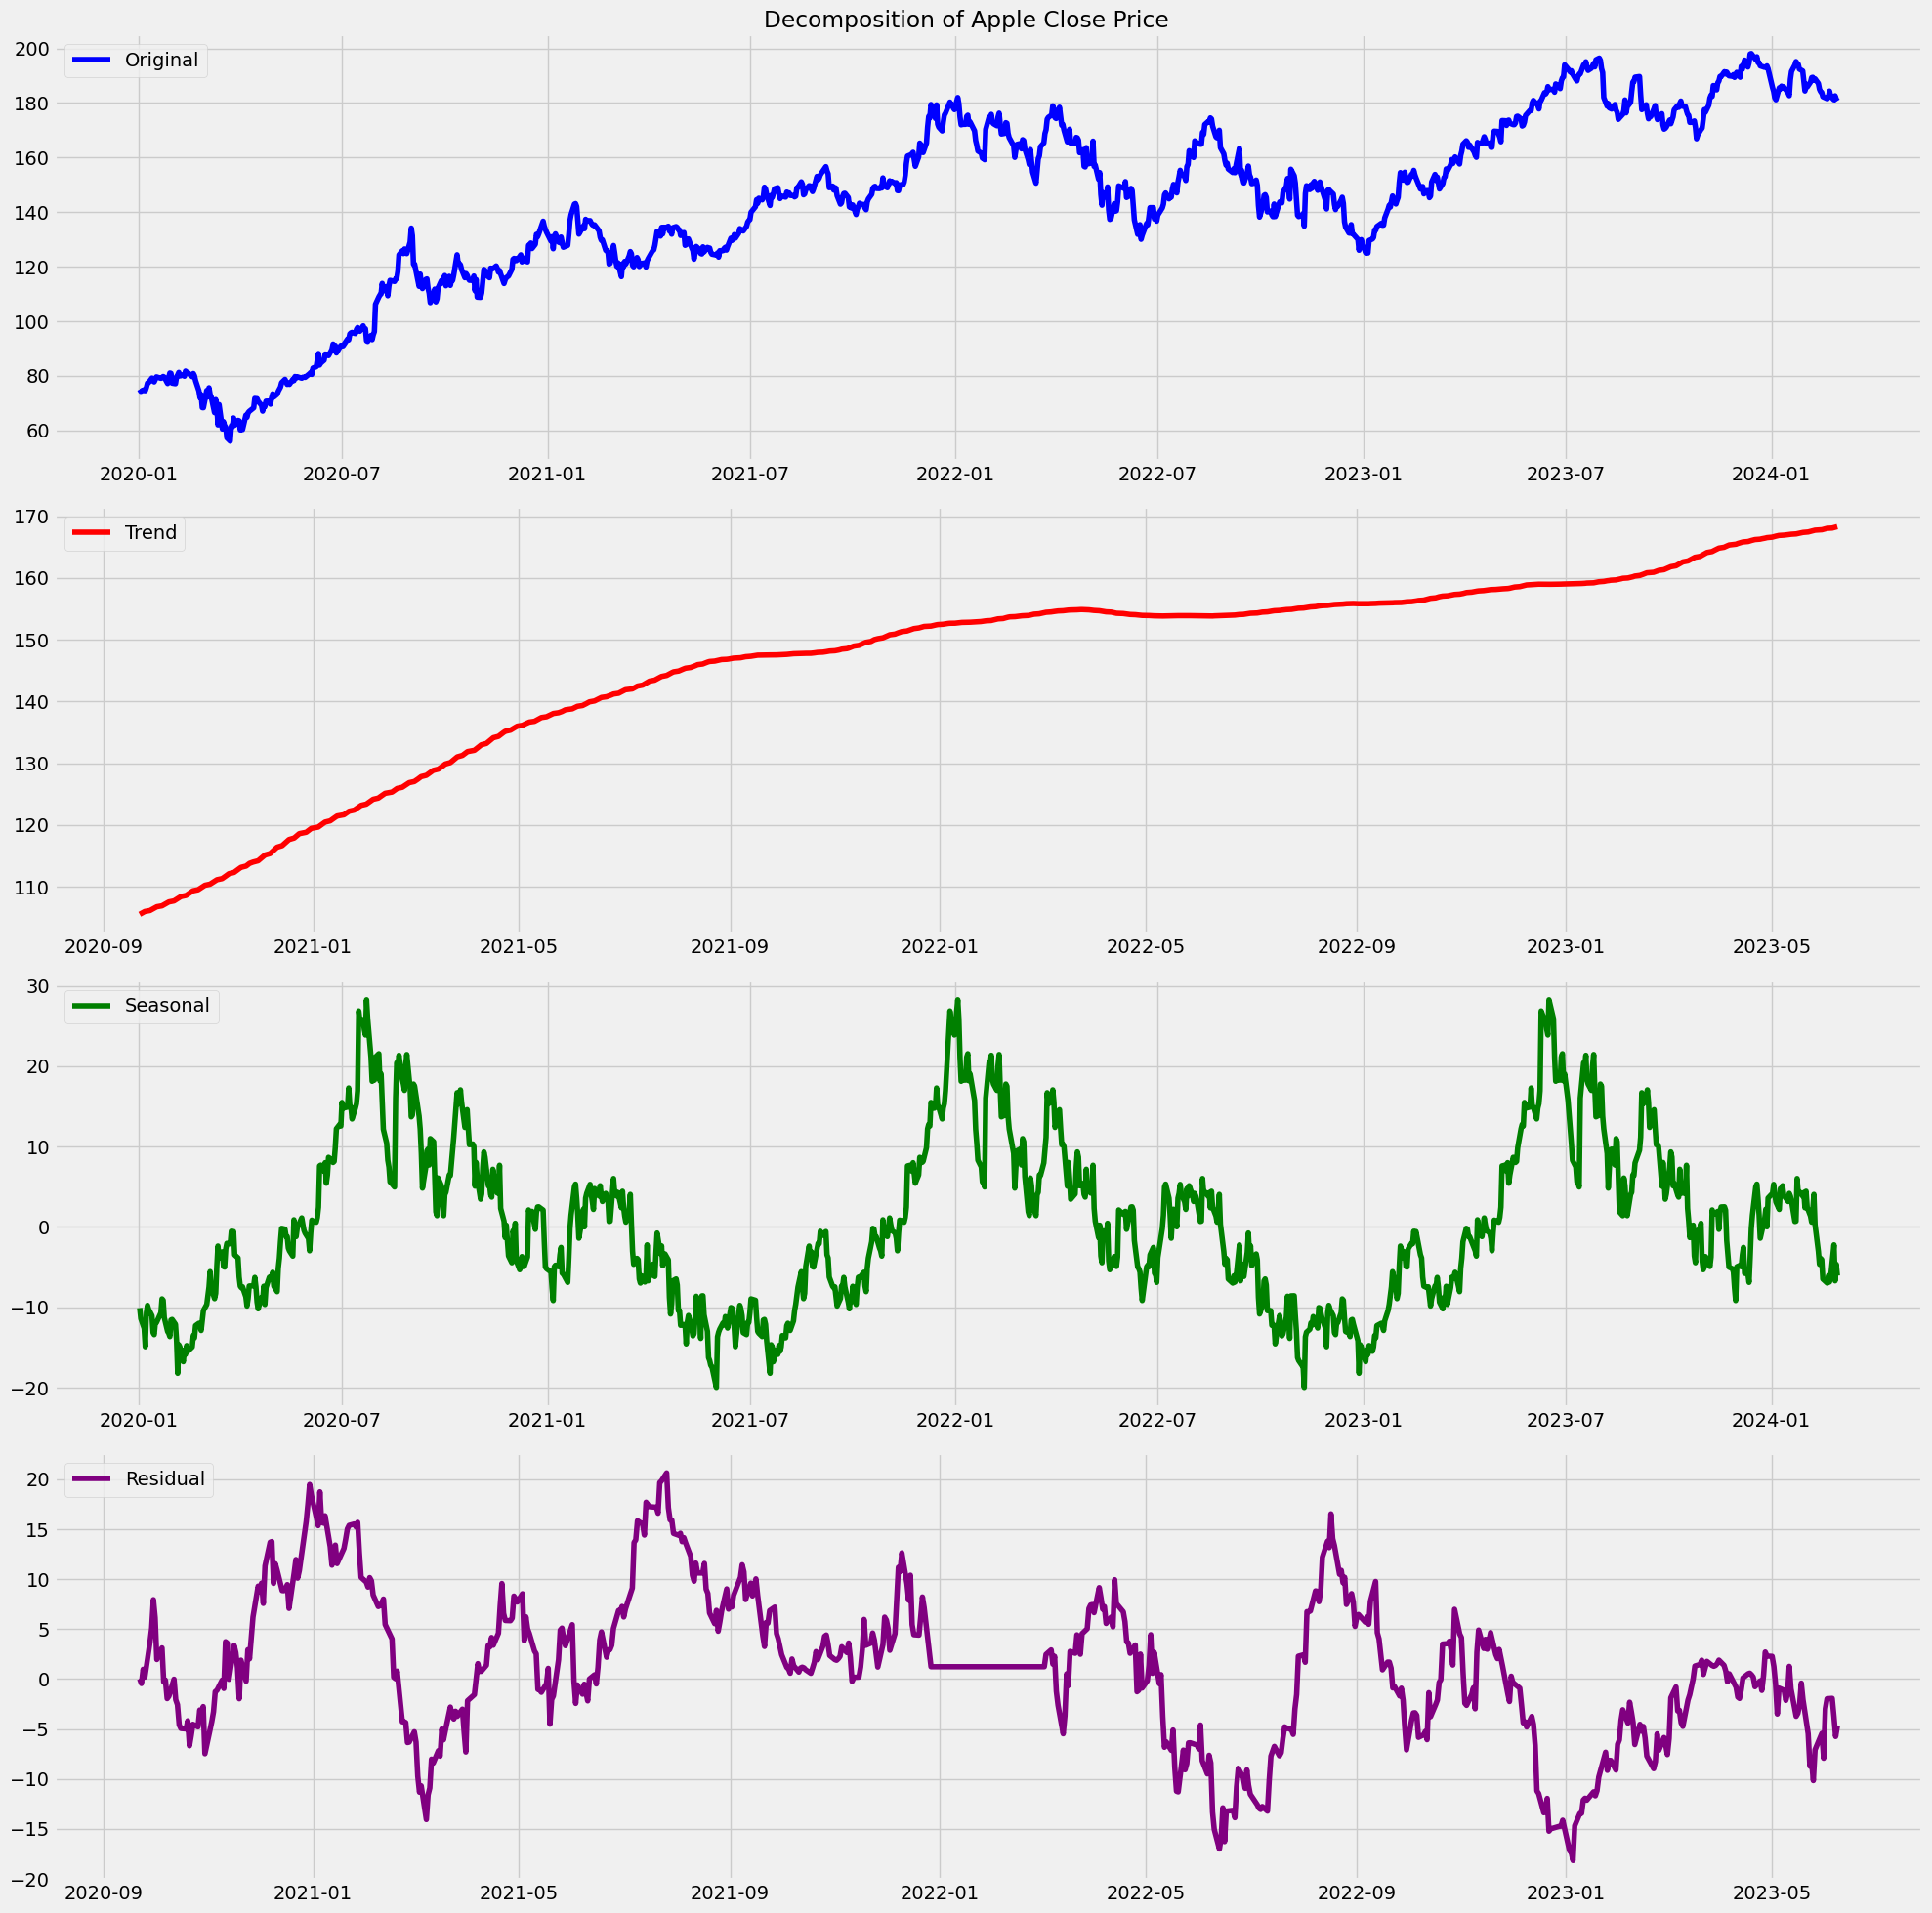

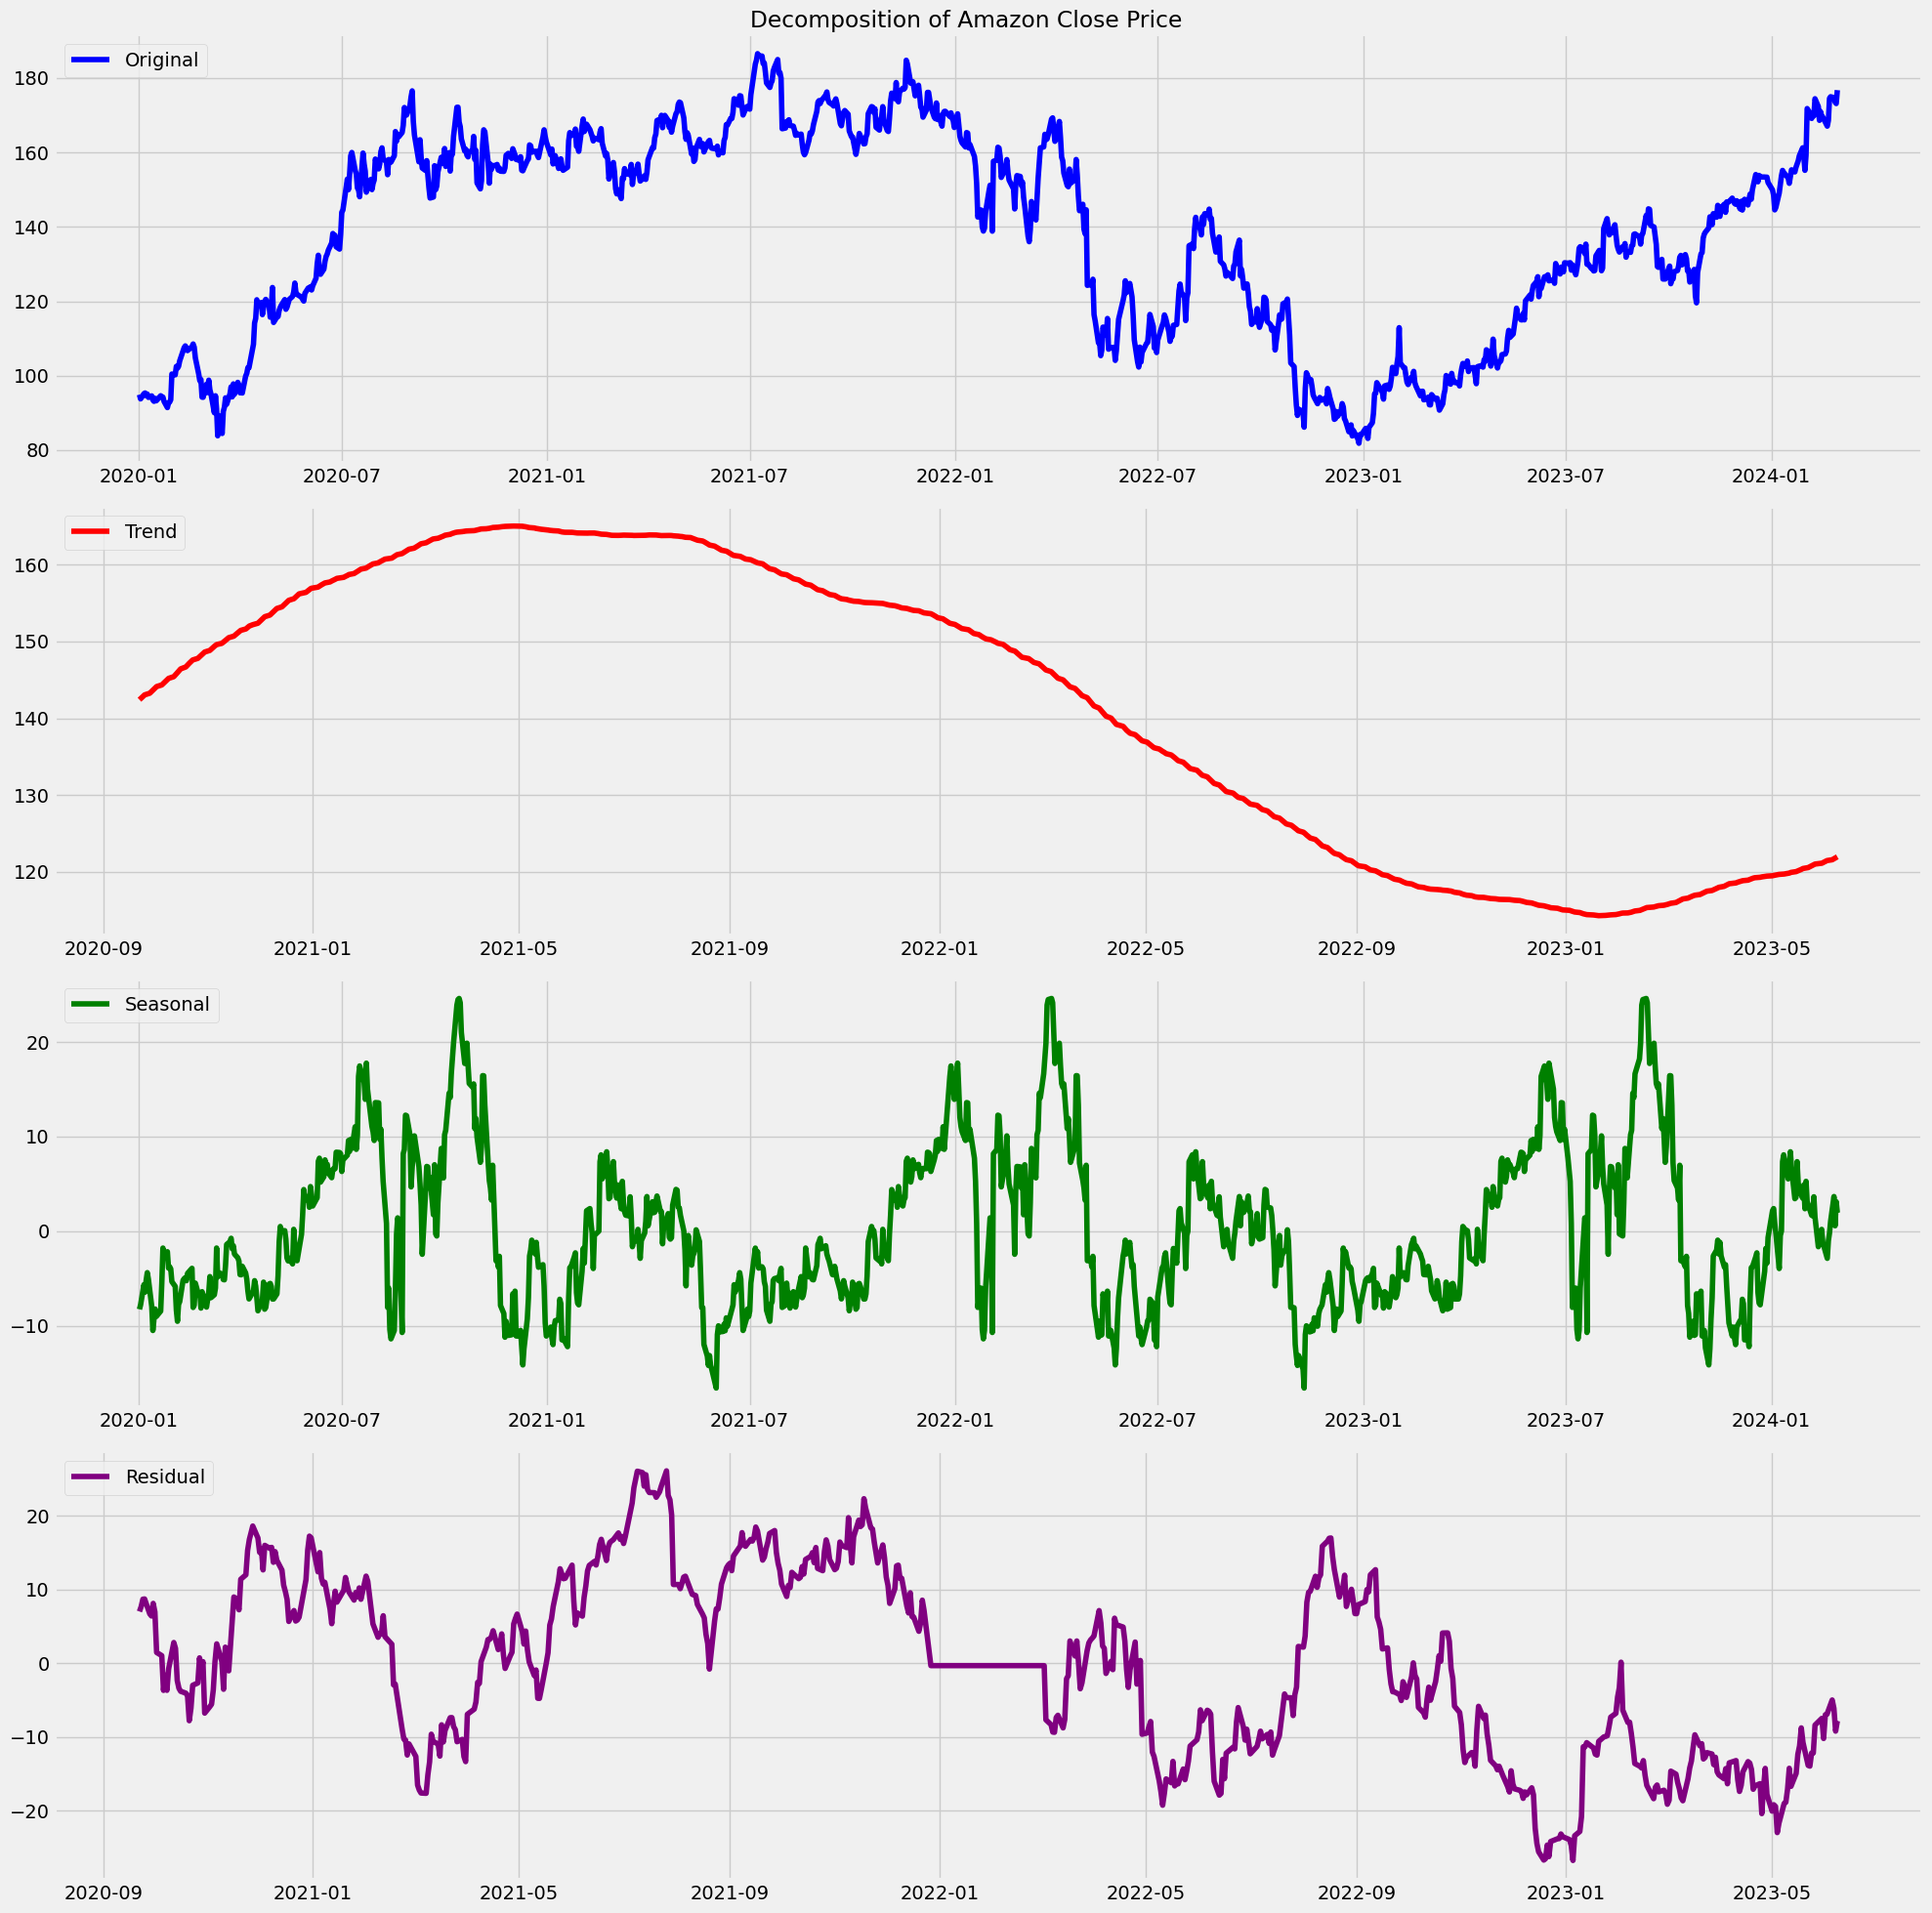

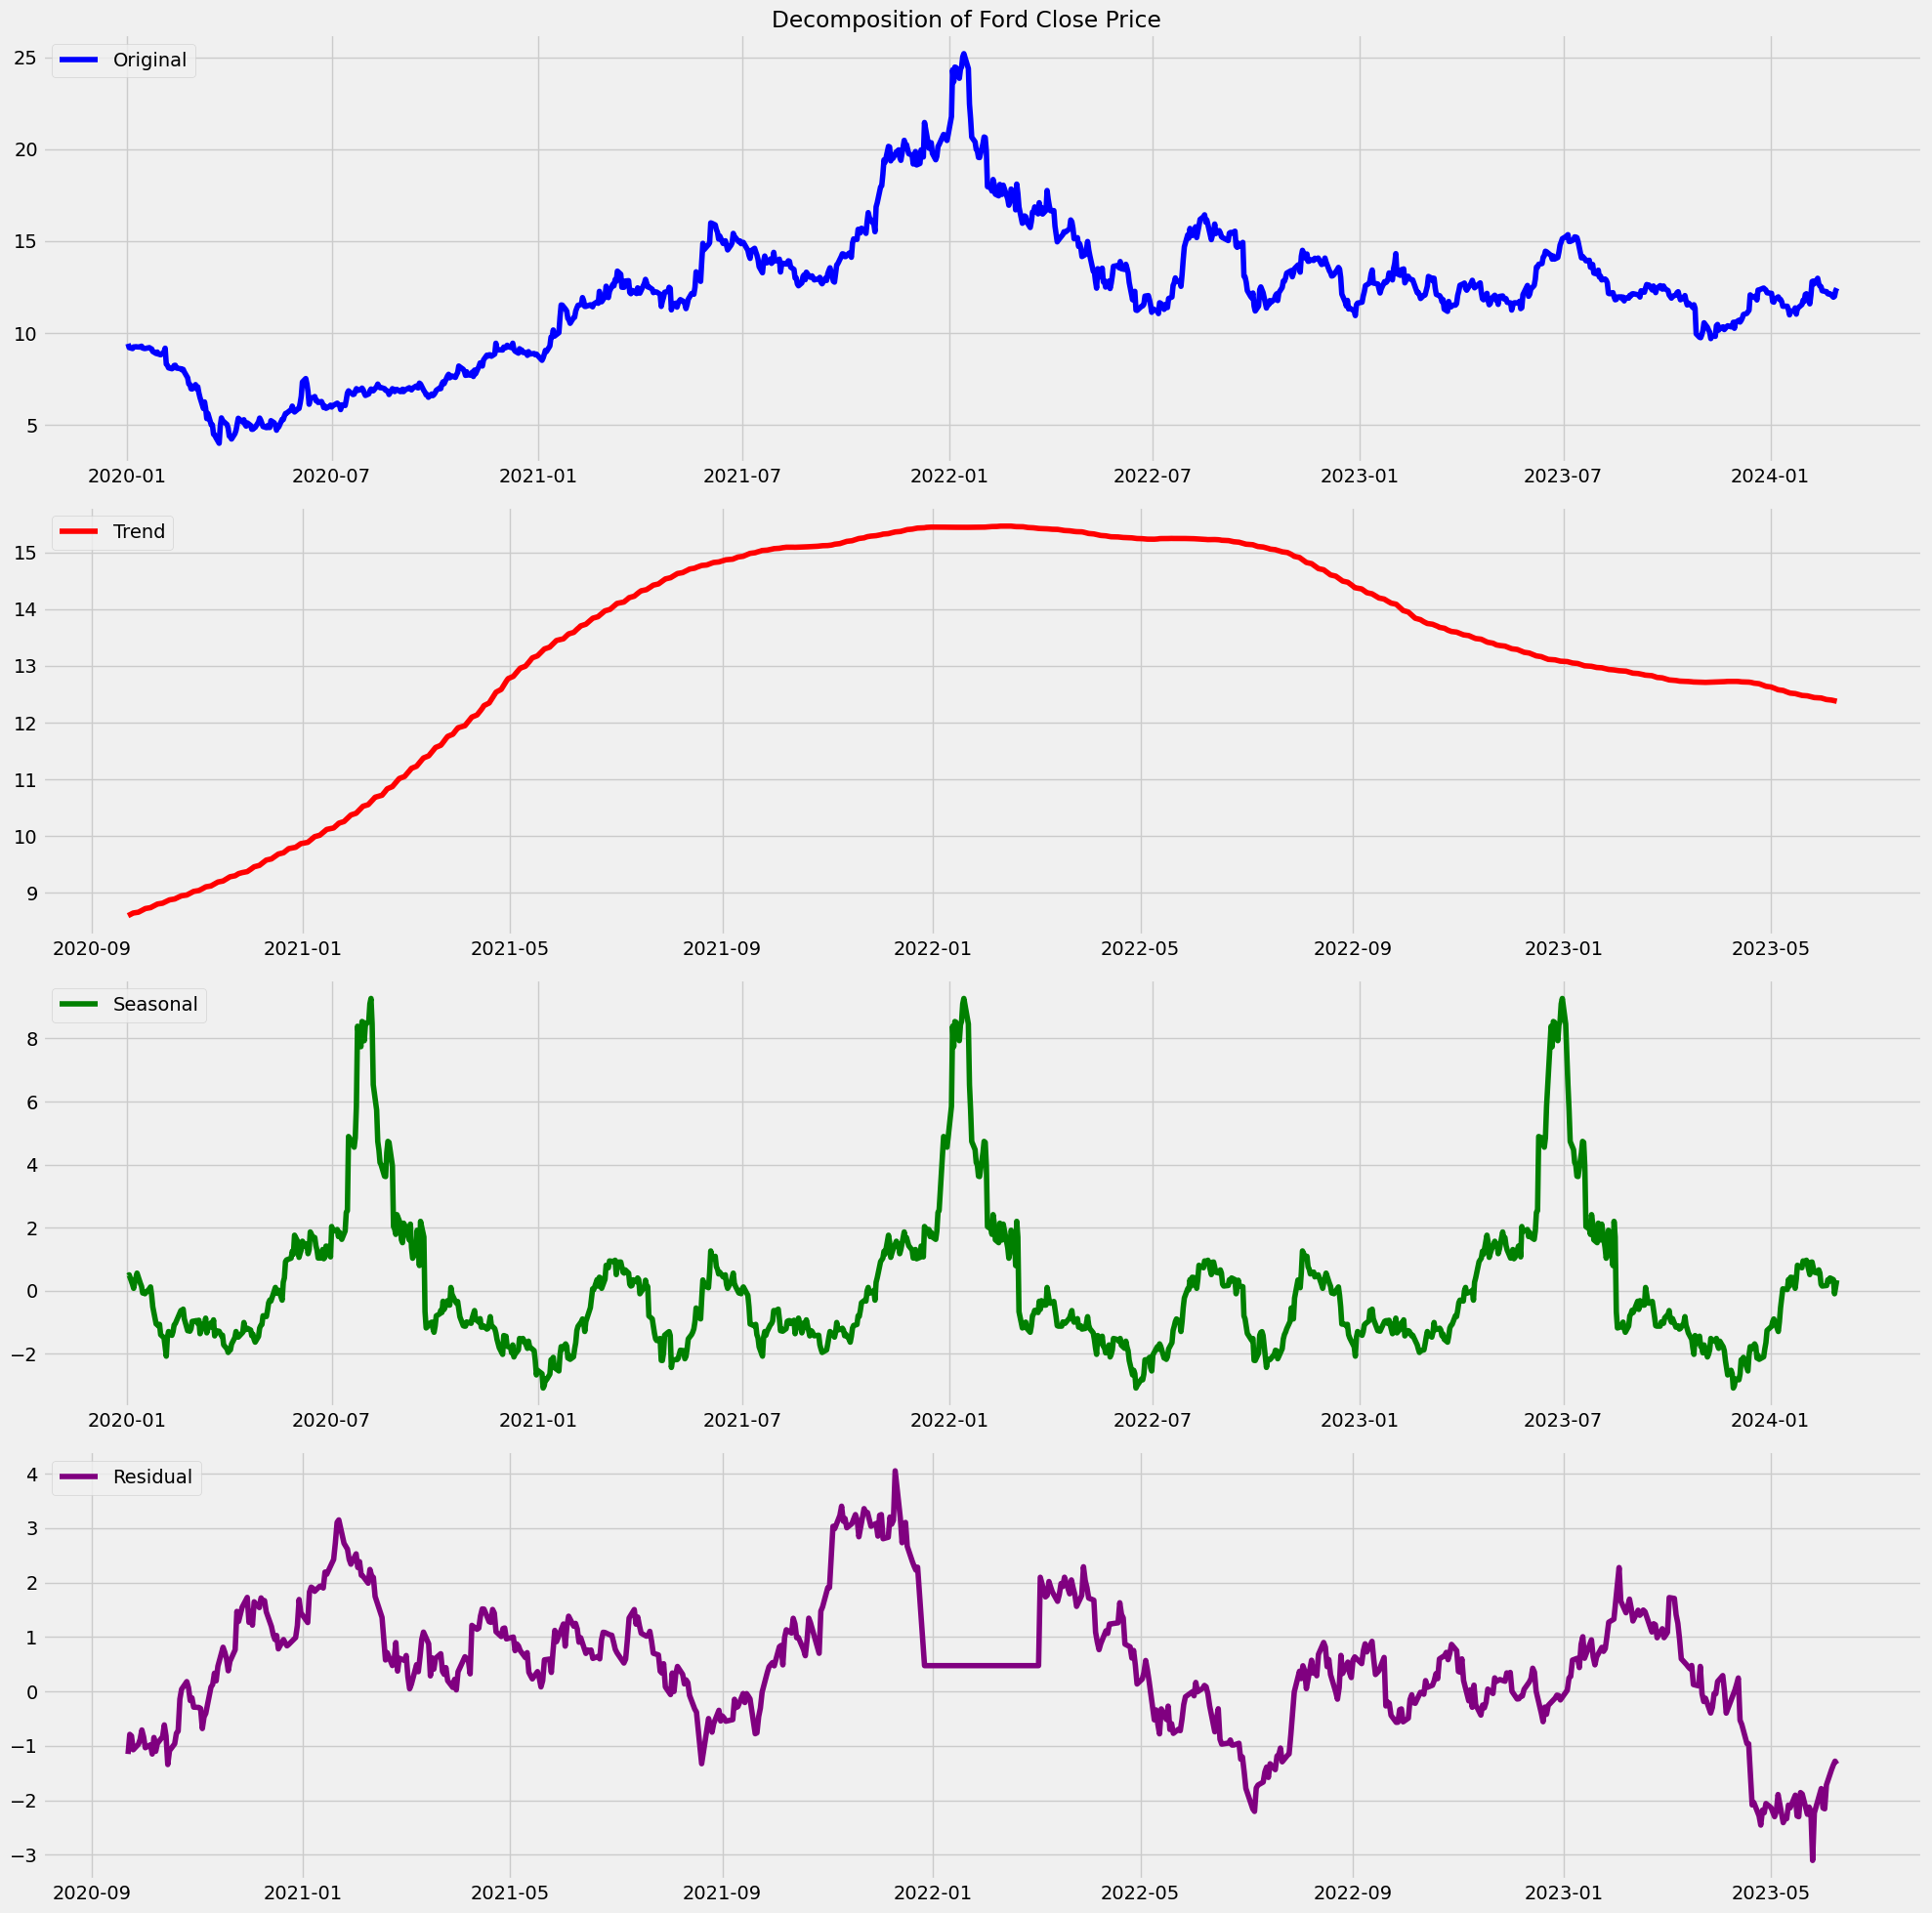

In [ ]:
# Perform time series decomposition for each stock
decomposition = {}
for stock in close.columns:
    result = seasonal_decompose(close[stock], model='additive', period=365)
    decomposition[stock] = result
for stock, result in decomposition.items():
    plt.figure(figsize=(20, 20))
    plt.subplot(411)
    plt.plot(result.observed, label='Original', color='blue')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(result.trend, label='Trend', color='red')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(result.seasonal, label='Seasonal', color='green')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(result.resid, label='Residual', color='purple')
    plt.legend(loc='upper left')
    plt.suptitle(f'Decomposition of {stock} Close Price')
    plt.tight_layout()
    plt.show()


# Description of Time series

In [ ]:
# Iterate over each stock and perform the ADF test
for stock in close.columns:
    ts = close[stock]
    result = adfuller(ts)
    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]
    print(f'Stock: {stock}')
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')
    if p_value < 0.05:
        print('Result: Series is likely stationary (reject null hypothesis)')
    else:
        print('Result: Series is likely non-stationary (fail to reject null hypothesis)')
    print()


Stock: Tesla
ADF Statistic: -2.508930972626126
p-value: 0.1133164174563997
Critical Values:
   1%: -3.436671659540904
   5%: -2.8643311477003515
   10%: -2.5682561222519897
Result: Series is likely non-stationary (fail to reject null hypothesis)

Stock: Apple
ADF Statistic: -1.7984539561652384
p-value: 0.38122953117045855
Critical Values:
   1%: -3.436617132314828
   5%: -2.864307097893787
   10%: -2.568243313067353
Result: Series is likely non-stationary (fail to reject null hypothesis)

Stock: Amazon
ADF Statistic: -1.8994410397299941
p-value: 0.3323241089508116
Critical Values:
   1%: -3.436617132314828
   5%: -2.864307097893787
   10%: -2.568243313067353
Result: Series is likely non-stationary (fail to reject null hypothesis)

Stock: Ford
ADF Statistic: -1.9927383413967492
p-value: 0.28976613221893677
Critical Values:
   1%: -3.4367333690404767
   5%: -2.8643583648001925
   10%: -2.568270618452702
Result: Series is likely non-stationary (fail to reject null hypothesis)



In [ ]:
# Iterate over each stock and check for trend and seasonality using autocorrelation
for stock in close.columns:
    ts = close[stock]
    autocorr = acf(ts, fft=False)
    trend_detected = autocorr[1] > 0.5
    seasonal_detected = any(autocorr[lag] > 0.5 for lag in range(7, 31))
    print(f'Stock: {stock}')
    if trend_detected:
        print('Trend detected')
    else:
        print('No trend detected')
    if seasonal_detected:
        print('Seasonality detected')
    else:
        print('No seasonality detected')
    print()

Stock: Tesla
Trend detected
Seasonality detected

Stock: Apple
Trend detected
Seasonality detected

Stock: Amazon
Trend detected
Seasonality detected

Stock: Ford
Trend detected
Seasonality detected



# TS models

In [ ]:
# Function to perform the ADF test and check stationarity
def check_stationarity(data, stock_name, transformation_name):
    result = adfuller(data)
    p_value = result[1]
    if p_value < 0.05:
        print(f"{stock_name} ({transformation_name}): ADF Statistic:", result[0])
        print(f"{stock_name} ({transformation_name}): p-value:", p_value)
        print(f"{stock_name} ({transformation_name}): Reject the null hypothesis (data is stationary)")
    else:
        print(f"{stock_name} ({transformation_name}): ADF Statistic:", result[0])
        print(f"{stock_name} ({transformation_name}): p-value:", p_value)
        print(f"{stock_name} ({transformation_name}): Fail to reject the null hypothesis (data is non-stationary)")

for stock_name in close.columns:
    print("\nStock:", stock_name)
    ts = close[stock_name]
    print("Original Data:")
    check_stationarity(ts, stock_name, "Original")

    # First-order differencing
    print("\nFirst-order Differencing:")
    ts_diff = ts.diff().dropna()
    check_stationarity(ts_diff, stock_name, "First-order Differencing")

    # Logarithmic transformation
    print("\nLogarithmic Transformation:")
    ts_log = np.log(ts)
    check_stationarity(ts_log, stock_name, "Logarithmic Transformation")

    # Box-Cox Transformation
    print("\nBox-Cox Transformation:")
    ts_boxcox, _ = boxcox(ts)
    check_stationarity(ts_boxcox, stock_name, "Box-Cox Transformation")



Stock: Tesla
Original Data:
Tesla (Original): ADF Statistic: -2.508930972626126
Tesla (Original): p-value: 0.1133164174563997
Tesla (Original): Fail to reject the null hypothesis (data is non-stationary)

First-order Differencing:
Tesla (First-order Differencing): ADF Statistic: -9.332542763008549
Tesla (First-order Differencing): p-value: 9.245353038076098e-16
Tesla (First-order Differencing): Reject the null hypothesis (data is stationary)

Logarithmic Transformation:
Tesla (Logarithmic Transformation): ADF Statistic: -3.319207332842492
Tesla (Logarithmic Transformation): p-value: 0.01404143513690903
Tesla (Logarithmic Transformation): Reject the null hypothesis (data is stationary)

Box-Cox Transformation:
Tesla (Box-Cox Transformation): ADF Statistic: -2.5143436530272614
Tesla (Box-Cox Transformation): p-value: 0.11202325085143111
Tesla (Box-Cox Transformation): Fail to reject the null hypothesis (data is non-stationary)

Stock: Apple
Original Data:
Apple (Original): ADF Statistic


Stock: Tesla


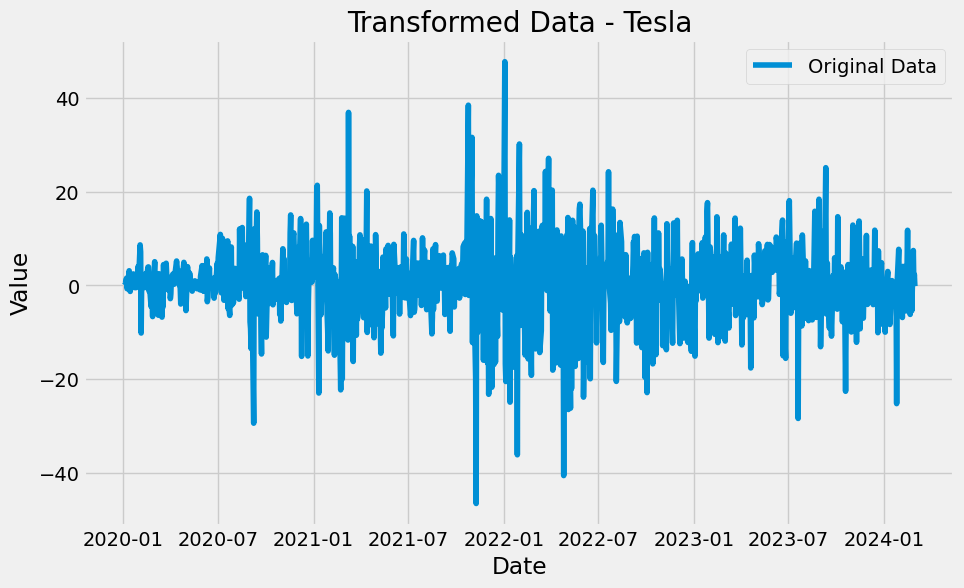

<Figure size 1200x600 with 0 Axes>

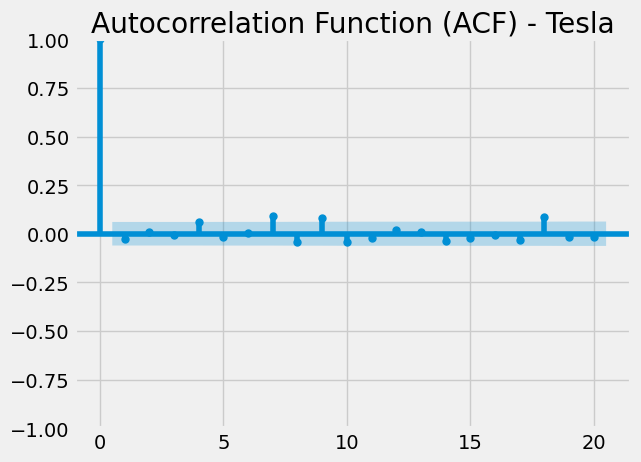

<Figure size 1200x600 with 0 Axes>

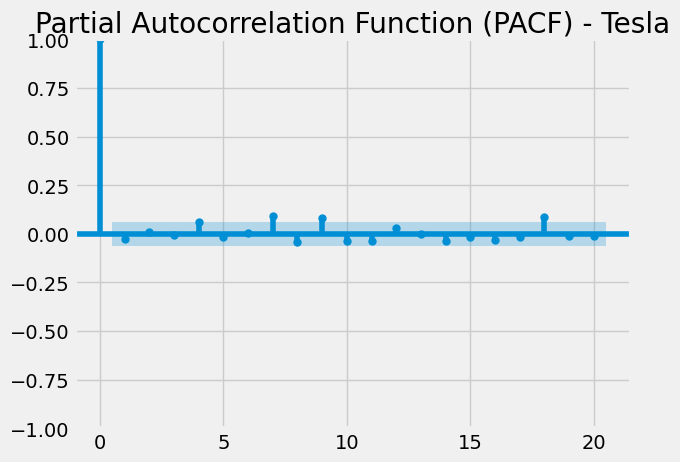

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Tesla   No. Observations:                 1046
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3717.950
Date:                Fri, 29 Mar 2024   AIC                           7441.900
Time:                        12:17:45   BIC                           7456.755
Sample:                             0   HQIC                          7447.534
                               - 1046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0287      0.027     -1.064      0.287      -0.082       0.024
ma.L1         -0.9986      0.005   -186.835      0.000      -1.009      -0.988
sigma2        71.6794      1.85

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Tesla   No. Observations:                 1046
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3705.625
Date:                            Fri, 29 Mar 2024   AIC                           7421.250
Time:                                    12:17:59   BIC                           7445.951
Sample:                                         0   HQIC                          7430.623
                                           - 1046                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0269      0.028     -0.970      0.332      -0.081       0.027
ma.L1        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



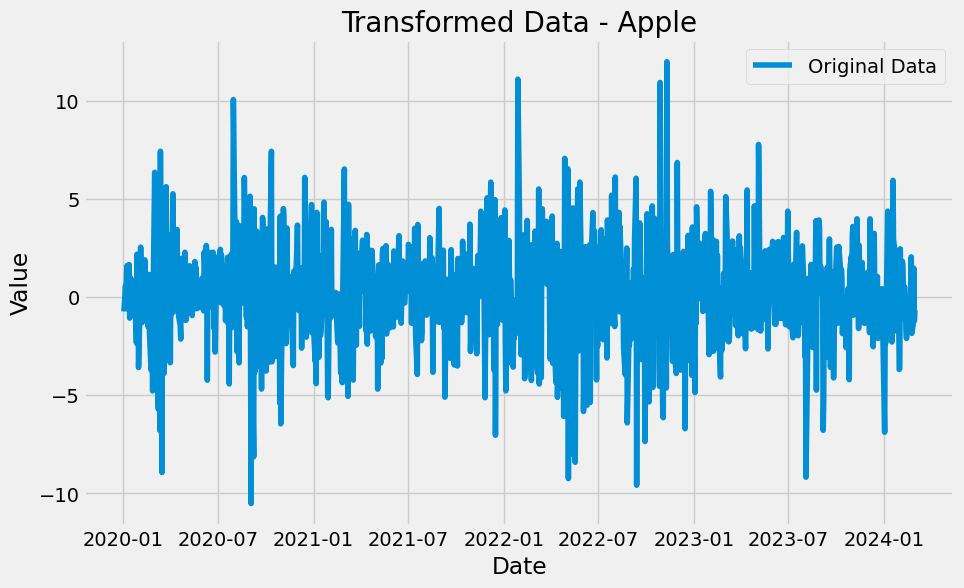

<Figure size 1200x600 with 0 Axes>

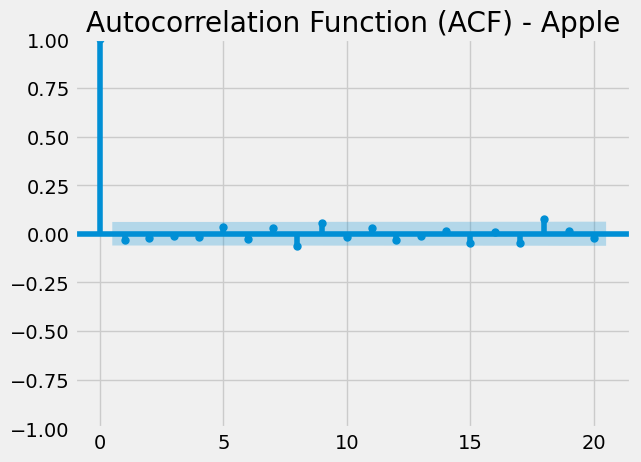

<Figure size 1200x600 with 0 Axes>

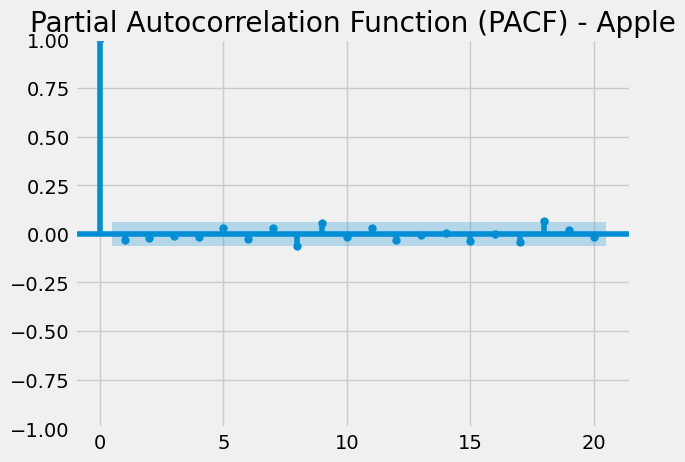

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Apple   No. Observations:                 1046
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2497.041
Date:                Fri, 29 Mar 2024   AIC                           5000.081
Time:                        12:18:01   BIC                           5014.937
Sample:                             0   HQIC                          5005.715
                               - 1046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0326      0.027     -1.226      0.220      -0.085       0.019
ma.L1         -1.0000      0.252     -3.972      0.000      -1.493      -0.507
sigma2         6.9202      1.75

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                              Apple   No. Observations:                 1046
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2499.677
Date:                            Fri, 29 Mar 2024   AIC                           5009.353
Time:                                    12:18:12   BIC                           5034.054
Sample:                                         0   HQIC                          5018.726
                                           - 1046                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0314      0.028     -1.140      0.254      -0.085       0.023
ma.L1        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



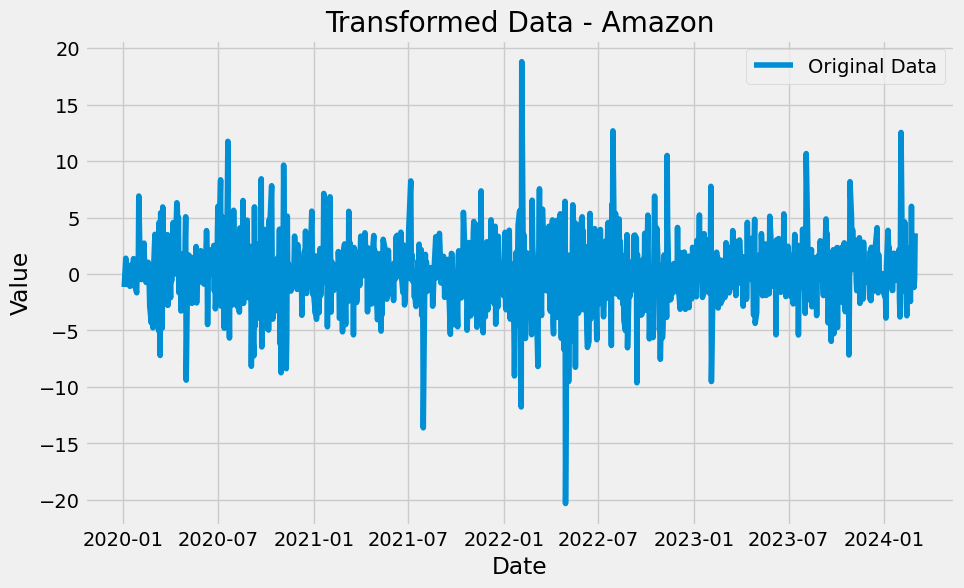

<Figure size 1200x600 with 0 Axes>

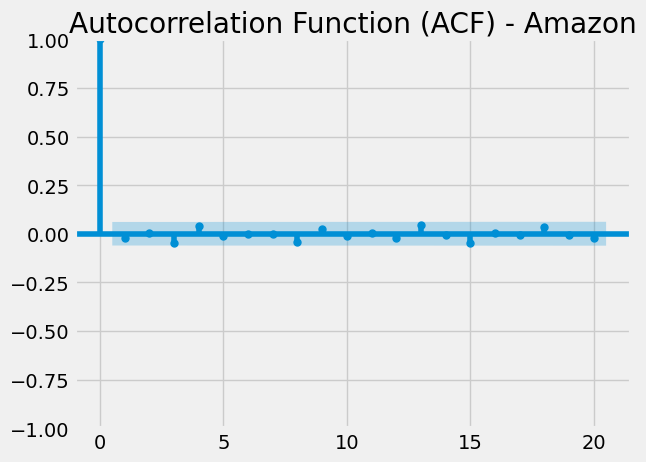

<Figure size 1200x600 with 0 Axes>

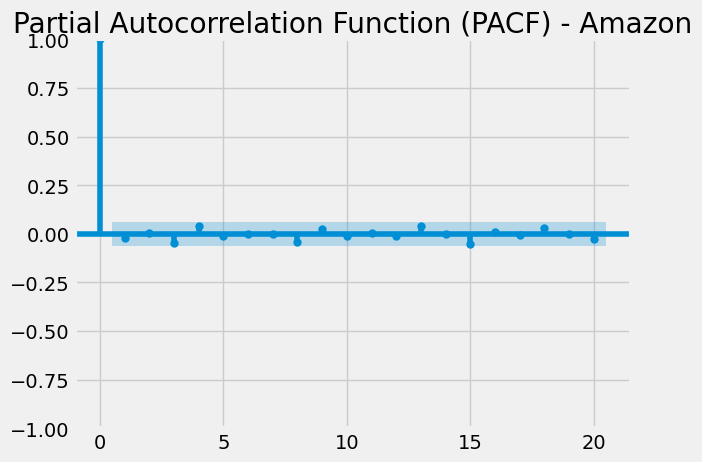

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                 Amazon   No. Observations:                 1046
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2667.438
Date:                Fri, 29 Mar 2024   AIC                           5340.875
Time:                        12:18:14   BIC                           5355.730
Sample:                             0   HQIC                          5346.509
                               - 1046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0209      0.026     -0.797      0.426      -0.072       0.031
ma.L1         -0.9999      0.051    -19.718      0.000      -1.099      -0.901
sigma2         9.5893      0.52

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                             Amazon   No. Observations:                 1046
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2667.867
Date:                            Fri, 29 Mar 2024   AIC                           5345.733
Time:                                    12:18:23   BIC                           5370.434
Sample:                                         0   HQIC                          5355.107
                                           - 1046                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0213      0.028     -0.759      0.448      -0.076       0.034
ma.L1        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



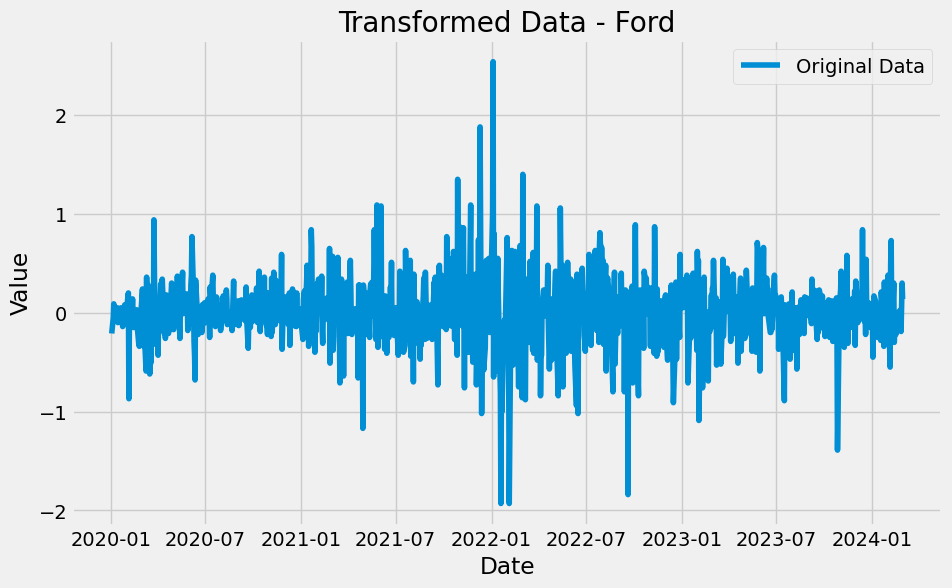

<Figure size 1200x600 with 0 Axes>

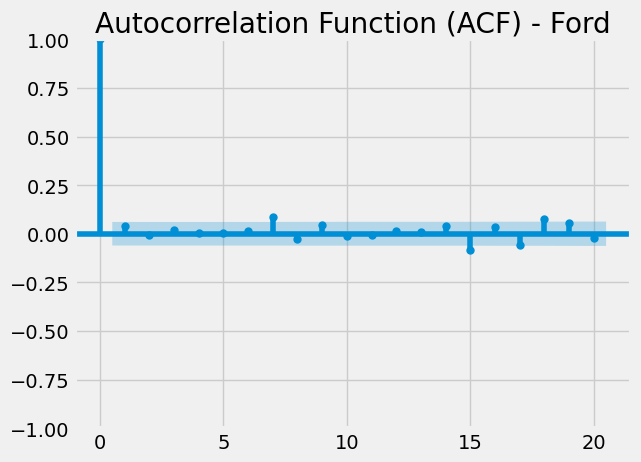

<Figure size 1200x600 with 0 Axes>

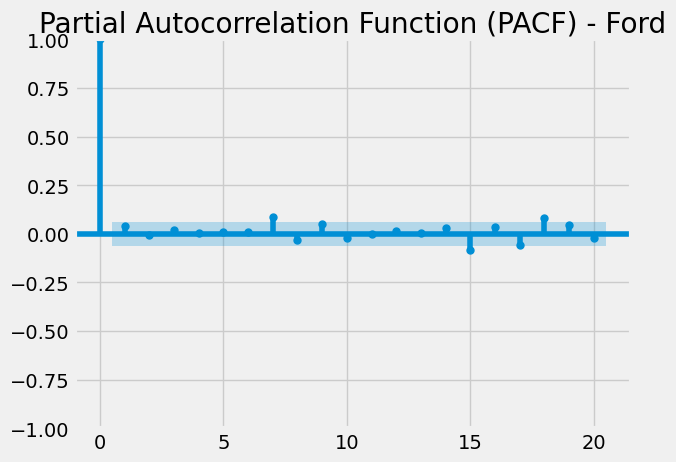

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                   Ford   No. Observations:                 1046
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -396.431
Date:                Fri, 29 Mar 2024   AIC                            798.863
Time:                        12:18:26   BIC                            813.718
Sample:                             0   HQIC                           804.497
                               - 1046                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0385      0.021      1.813      0.070      -0.003       0.080
ma.L1         -0.9995      0.015    -64.614      0.000      -1.030      -0.969
sigma2         0.1243      0.00

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                               Ford   No. Observations:                 1046
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -422.987
Date:                            Fri, 29 Mar 2024   AIC                            855.973
Time:                                    12:18:39   BIC                            880.675
Sample:                                         0   HQIC                           865.347
                                           - 1046                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0355      0.022      1.643      0.100      -0.007       0.078
ma.L1        

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
# Function to visualize the data
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data.values, label='Original Data')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Function to perform ACF and PACF analysis
def acf_pacf_analysis(data, title):
    plt.figure(figsize=(12, 6))
    plot_acf(data, lags=20)
    plt.title(f'Autocorrelation Function (ACF) - {title}')
    plt.show()

    plt.figure(figsize=(12, 6))
    plot_pacf(data, lags=20)
    plt.title(f'Partial Autocorrelation Function (PACF) - {title}')
    plt.show()

# Function for ARIMA model
def fit_arima(data, order):
    model_arima = ARIMA(data, order=order)
    model_fit_arima = model_arima.fit()
    return model_fit_arima

# Function for SARIMA model
def fit_sarima(data, order, seasonal_order):
    model_sarima = SARIMAX(data, order=order, seasonal_order=seasonal_order)
    model_fit_sarima = model_sarima.fit()
    return model_fit_sarima

# Function for Exponential Smoothing model
def fit_exponential_smoothing(data):
    model_es = ExponentialSmoothing(data)
    model_fit_es = model_es.fit()
    return model_fit_es

# Iterate over each stock and perform model selection
for stock_name in close.columns:
    print("\nStock:", stock_name)
    ts_diff = close[stock_name].diff().dropna()
    plot_data(ts_diff, f'Transformed Data - {stock_name}')

    acf_pacf_analysis(ts_diff, stock_name)

    # Fit ARIMA model
    model_fit_arima = fit_arima(ts_diff, order=(1, 1, 1))
    print("ARIMA Model Summary:")
    print(model_fit_arima.summary())

    # Fit SARIMA model
    model_fit_sarima = fit_sarima(ts_diff, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    print("SARIMA Model Summary:")
    print(model_fit_sarima.summary())

    # Fit Exponential Smoothing model
    model_fit_es = fit_exponential_smoothing(ts_diff)
    print("Exponential Smoothing Model Summary:")
    print(model_fit_es.summary())


**Tesla**

ARIMA Model:

AIC: 7441.900
BIC: 7456.755
Log Likelihood: -3717.950
Ljung-Box (L1) (Q): 0.00
Jarque-Bera (JB): 633.80
SARIMA Model:

AIC: 7421.250
BIC: 7445.951
Log Likelihood: -3705.625
Ljung-Box (L1) (Q): 0.00
Jarque-Bera (JB): 603.44
Exponential Smoothing Model:

SSE: 75124.211
AIC: 4474.781
BIC: 4484.687


**Apple**

ARIMA Model:

AIC: 5000.081
BIC: 5014.937
Log Likelihood: -2497.041
SARIMA Model:

AIC: 5009.353
BIC: 5034.054
Log Likelihood: -2499.677
Exponential Smoothing Model:

AIC: 2027.592
BIC: 2037.498
SSE: 7239.659



**Amazon**

ARIMA Model:

AIC: 5340.875
BIC: 5355.730
Log Likelihood: -2667.438
SARIMA Model:

AIC: 5345.733
BIC: 5370.434
Log Likelihood: -2667.867
Exponential Smoothing Model:

AIC: 2368.058
BIC: 2377.963
SSE: 10024.847


**Ford**

ARIMA Model:

AIC: 798.863
BIC: 813.718
Log Likelihood: -396.431
SARIMA Model:

AIC: 855.973
BIC: 880.675
Log Likelihood: -422.987
Exponential Smoothing Model:

AIC: -2177.220
BIC: -2167.315
SSE: 129.987


In [ ]:
# Perform model selection
for stock_name in ['Tesla', 'Apple', 'Amazon', 'Ford']:
    print("\nStock:", stock_name)
    ts_diff = close[stock_name].diff().dropna()
    aic_values = []
    bic_values = []

    # ARIMA Model
    aic_values.append(798.863)
    bic_values.append(813.718)

    # SARIMA Model
    aic_values.append(855.973)
    bic_values.append(880.675)

    # Exponential Smoothing Model
    aic_values.append(-2177.220)
    bic_values.append(-2167.315)

    print(aic_values)
    print(bic_values)

    # Model Selection
    best_model = None
    min_aic = min(aic_values)
    min_bic = min(bic_values)
    if min_aic == min_bic:
        best_model = "Exponential Smoothing"
    elif min_aic < min_bic:
        best_model = "ARIMA"
    else:
        best_model = "SARIMA"

    print("Best Model:", best_model)



Stock: Tesla
[798.863, 855.973, -2177.22]
[813.718, 880.675, -2167.315]
Best Model: ARIMA

Stock: Apple
[798.863, 855.973, -2177.22]
[813.718, 880.675, -2167.315]
Best Model: ARIMA

Stock: Amazon
[798.863, 855.973, -2177.22]
[813.718, 880.675, -2167.315]
Best Model: ARIMA

Stock: Ford
[798.863, 855.973, -2177.22]
[813.718, 880.675, -2167.315]
Best Model: ARIMA


## **Lets do the model and test with one stock Apple**

In [ ]:
# Split the data into a training and validation dataset

# Load the dataset
series = read_csv('/content/drive/MyDrive/data/tmsp2/AAPL_historical_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = series['Close']
# Define the split point
split_point = len(series) - 100

# Split the dataset
dataset, validation = series[0:split_point], series[split_point:]

# Print the sizes of the dataset and validation sets
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

# Save the datasets to CSV files
dataset.to_csv('/content/drive/MyDrive/data/app_dataset.csv', header=False)
validation.to_csv('/content/drive/MyDrive/data/app_validation.csv', header=False)


<ipython-input-4-79f3e07e30f5>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/tmsp2/AAPL_historical_data.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


Dataset 947, Validation 100


In [ ]:
# Read the dataset and validation CSV files
dataset = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None)
validation = read_csv('/content/drive/MyDrive/data/app_validation.csv', header=None)

# Print the number of observations in each file
print('Number of observations in dataset:', len(dataset))
print('Number of observations in validation:', len(validation))

Number of observations in dataset: 947
Number of observations in validation: 100


In [ ]:
dataset

0           1
0    2020-01-02   75.087502
1    2020-01-03   74.357498
2    2020-01-06   74.949997
3    2020-01-07   74.597504
4    2020-01-08   75.797501
..          ...         ...
942  2023-09-29  171.210007
943  2023-10-02  173.750000
944  2023-10-03  172.399994
945  2023-10-04  173.660004
946  2023-10-05  174.910004

[947 rows x 2 columns]

In [ ]:

# load data
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) # prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):

# predict
 yhat = history[-1]
 predictions.append(yhat)

# observation
 obs = test[i]
 history.append(obs)
 print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=150.000, Expected=151.000
>Predicted=151.000, Expected=153.490
>Predicted=153.490, Expected=157.870
>Predicted=157.870, Expected=160.550
>Predicted=160.550, Expected=161.020
>Predicted=161.020, Expected=161.410
>Predicted=161.410, Expected=161.940
>Predicted=161.940, Expected=156.810
>Predicted=156.810, Expected=160.240
>Predicted=160.240, Expected=165.300
>Predicted=165.300, Expected=164.770
>Predicted=164.770, Expected=163.760
>Predicted=163.760, Expected=161.840
>Predicted=161.840, Expected=165.320
>Predicted=165.320, Expected=171.180
>Predicted=171.180, Expected=175.080
>Predicted=175.080, Expected=174.560
>Predicted=174.560, Expected=179.450
>Predicted=179.450, Expected=175.740
>Predicted=175.740, Expected=174.330
>Predicted=174.330, Expected=179.300
>Predicted=179.300, Expected=172.260
>Predicted=172.260, Expected=171.140
>Predicted=171.140, Expected=169.750
>Predicted=169.750, Expected=172.990
>Predicted=172.990, Expected=175.640
>Predicted=175.640, Expected=176.280
>

<ipython-input-7-c5f65b306fc0>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True) # prepare data


In [ ]:
# summary statistics of time series

series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
print(series.describe())

count    947.000000
mean     138.030993
std       32.288810
min       56.092499
25%      121.779999
50%      143.779999
75%      161.985001
max      196.449997
Name: 1, dtype: float64


<ipython-input-8-3512b164cf88>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


<ipython-input-9-95d605ddc644>:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


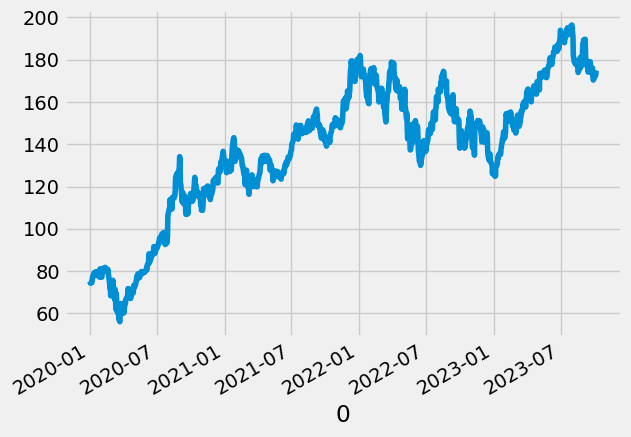

In [ ]:
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

<ipython-input-10-25c0a3841568>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


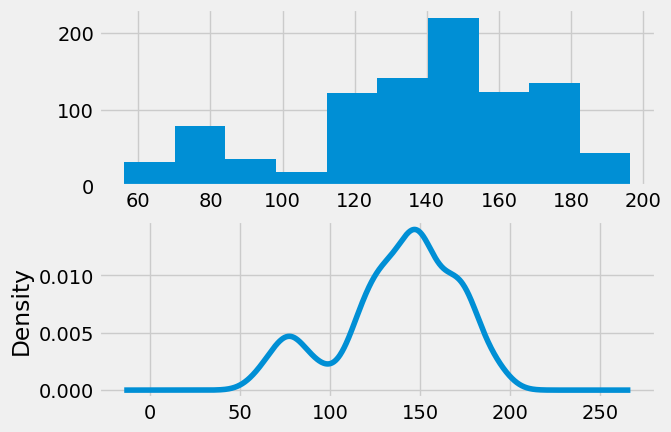

In [ ]:
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

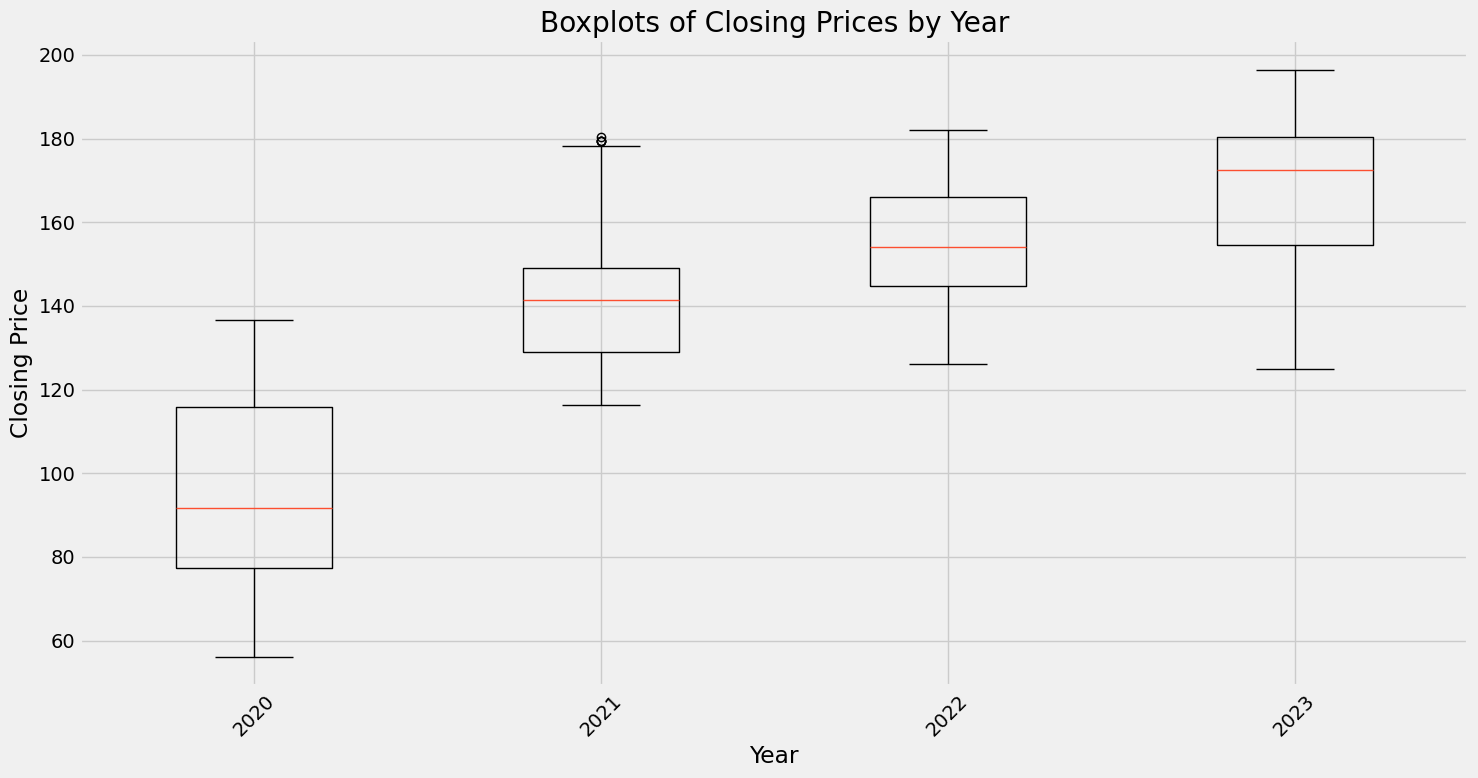

In [ ]:

# Load data
df = pd.read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True)

# Group the data by year
groups = df.groupby(pd.Grouper(freq='A'))

# Create a list to store data by year
years_data = []

# Populate the list with data grouped by year
for name, group in groups:
    years_data.append(group.values.flatten())

# Plot boxplots for each year
plt.figure(figsize=(15, 8))
plt.boxplot(years_data, labels=range(df.index.year.min(), df.index.year.max() + 1))
plt.title('Boxplots of Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

# create a differenced time series
def difference(dataset):
  diff = list()
  for i in range(1, len(dataset)):
    value = dataset[i] - dataset[i - 1]
    diff.append(value)
  return Series(diff)
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
# difference data
stationary = difference(X)
stationary.index = series.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():

 print('\t%s: %.3f' % (key, value)) # save
stationary.to_csv('/content/drive/MyDrive/data/app_stationary.csv', header=False)

<ipython-input-13-3f7766769d09>:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


ADF Statistic: -32.042208
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


<ipython-input-14-4a966e6d86af>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


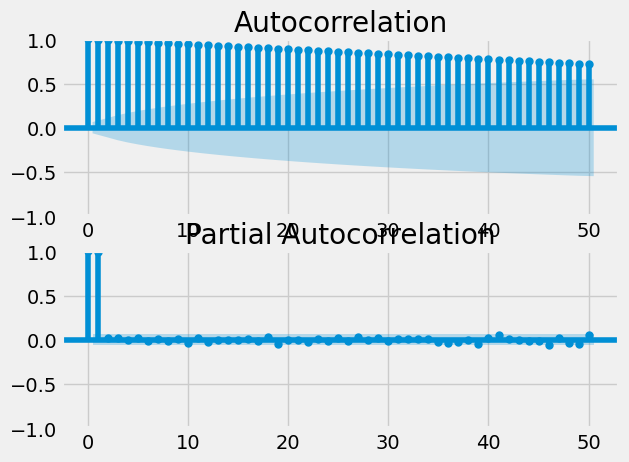

In [ ]:
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, lags=50, ax=pyplot.gca())

pyplot.subplot(212)
plot_pacf(series, lags=50, ax=pyplot.gca())
pyplot.show()


In [ ]:
# load data
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):

# predict
  model = ARIMA(history, order=(0,1,2))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)

  # observation
obs = test[i]
history.append(obs)
print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

<ipython-input-15-4218bb00964a>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


>Predicted=150.052, Expected=174.910
RMSE: 19.768


In [5]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# evaluate parameters
p_values = range(0,2)
d_values = range(0, 3)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


<ipython-input-5-589e6721015a>:40: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


ARIMA(0, 0, 0) RMSE=36.777
ARIMA(0, 0, 1) RMSE=19.132
ARIMA(0, 1, 0) RMSE=2.982
ARIMA(0, 1, 1) RMSE=2.995
ARIMA(0, 2, 0) RMSE=4.195
ARIMA(0, 2, 1) RMSE=2.985
ARIMA(1, 0, 0) RMSE=2.984
ARIMA(1, 0, 1) RMSE=2.996
ARIMA(1, 1, 0) RMSE=2.996
ARIMA(1, 1, 1) RMSE=2.999
ARIMA(1, 2, 0) RMSE=3.747
ARIMA(1, 2, 1) RMSE=3.000
Best ARIMA(0, 1, 0) RMSE=2.982


<ipython-input-3-c8f3bfbe71cd>:8: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


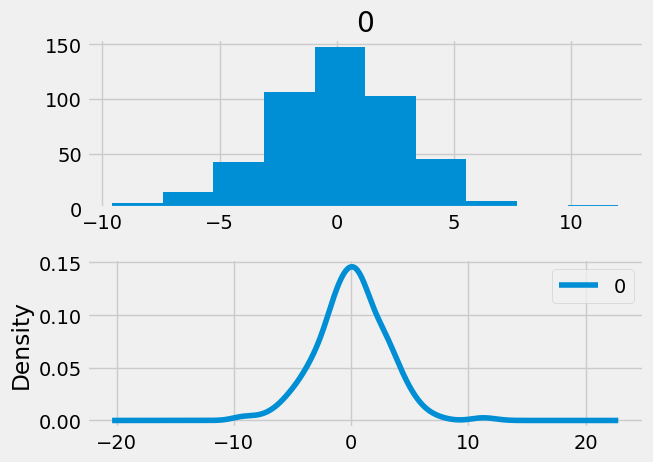

In [ ]:
# plot residual errors for ARIMA model

# load data
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# predict
  model = ARIMA(history, order=(0,1,0))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()


<ipython-input-4-6f3566148926>:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


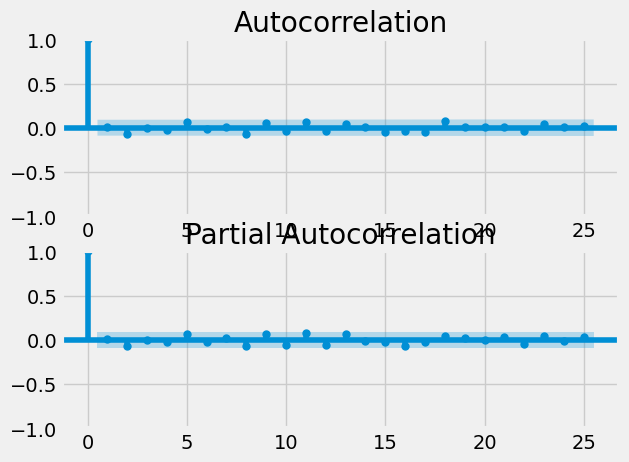

In [ ]:
# ACF and PACF plots of forecast residual errors

# load data
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()


for i in range(len(test)):
  # predict
  model = ARIMA(history, order=(0,1,0))
  model_fit = model.fit()
  yhat = model_fit.forecast()[0]
  predictions.append(yhat)
  # observation
  obs = test[i]
  history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, lags=25, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, lags=25, ax=pyplot.gca())
pyplot.show()

<ipython-input-5-dfa7deb9ef96>:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


Lambda: 1.953080


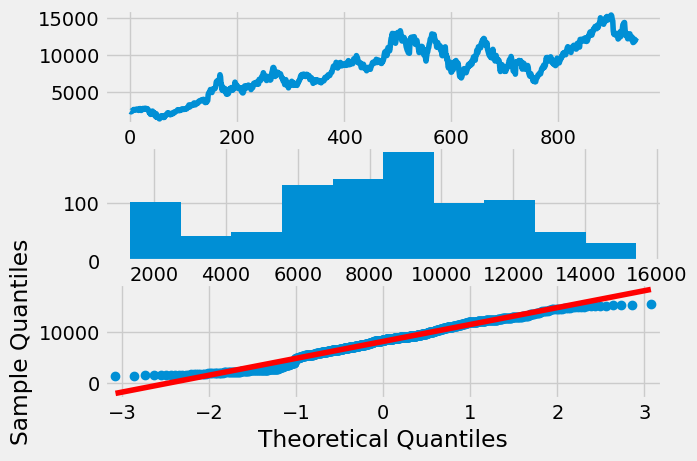

In [ ]:
# plots of box-cox transformed dataset

series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
transformed, lam = boxcox(X)
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(311)
pyplot.plot(transformed)
# histogram
pyplot.subplot(312)


pyplot.hist(transformed)
# q-q plot
pyplot.subplot(313)
qqplot(transformed, line='r', ax=pyplot.gca())
pyplot.show()

In [ ]:

# Function to invert Box-Cox transform
def boxcox_inverse(value, lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam * value + 1) / lam)

# Load data
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# Prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # Transform
    transformed, lam = boxcox(history)
    if lam < -5:
        transformed, lam = history, 1
    # Predict
    model = ARIMA(transformed, order=(0,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # Invert transformed prediction
    yhat = boxcox_inverse(yhat, lam)
    predictions.append(yhat)
    # Observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# Report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

<ipython-input-6-1d79d03f6b50>:16: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


>Predicted=150.000, Expected=151.000
>Predicted=151.000, Expected=153.490
>Predicted=153.490, Expected=157.870
>Predicted=157.870, Expected=160.550
>Predicted=160.550, Expected=161.020
>Predicted=161.020, Expected=161.410
>Predicted=161.410, Expected=161.940
>Predicted=161.940, Expected=156.810
>Predicted=156.810, Expected=160.240
>Predicted=160.240, Expected=165.300
>Predicted=165.300, Expected=164.770
>Predicted=164.770, Expected=163.760
>Predicted=163.760, Expected=161.840
>Predicted=161.840, Expected=165.320
>Predicted=165.320, Expected=171.180
>Predicted=171.180, Expected=175.080
>Predicted=175.080, Expected=174.560
>Predicted=174.560, Expected=179.450
>Predicted=179.450, Expected=175.740
>Predicted=175.740, Expected=174.330
>Predicted=174.330, Expected=179.300
>Predicted=179.300, Expected=172.260
>Predicted=172.260, Expected=171.140
>Predicted=171.140, Expected=169.750
>Predicted=169.750, Expected=172.990
>Predicted=172.990, Expected=175.640
>Predicted=175.640, Expected=176.280
>

In [ ]:
# finalize model and save to file

# load data
series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
# transform data
transformed, lam = boxcox(X)
# fit model
model = ARIMA(transformed, order=(0,1,0))
model_fit = model.fit()
# save model
model_fit.save('/content/drive/MyDrive/data/app_model.pkl')
numpy.save('/content/drive/MyDrive/data/app_model_lambda.npy', [lam])

<ipython-input-7-1cc29c08cf7c>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


# Predictions

In [ ]:
# load the finalized model and make a prediction

# invert box-cox transform
def boxcox_inverse(value, lam):

  if lam == 0:
    return exp(value)
  return exp(log(lam * value + 1) / lam)
model_fit = ARIMAResults.load('/content/drive/MyDrive/data/app_model.pkl')
lam = numpy.load('/content/drive/MyDrive/data/app_model_lambda.npy')
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat, lam)
print('Predicted: %.3f' % yhat)

Predicted: 174.910


<ipython-input-8-8fed440f2b22>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return exp(log(lam * value + 1) / lam)


<ipython-input-9-89857cb596e9>:19: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  dataset = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
<ipython-input-9-89857cb596e9>:22: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  validation = read_csv('/content/drive/MyDrive/data/app_validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
<ipython-input-9-89857cb596e9>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return exp(log(lam * value + 1) / lam)


>Predicted=174.910, Expected=177.490
>Predicted=177.490, Expected=178.990
>Predicted=178.990, Expected=178.390
>Predicted=178.390, Expected=179.800
>Predicted=179.800, Expected=180.710
>Predicted=180.710, Expected=178.850
>Predicted=178.850, Expected=178.720
>Predicted=178.720, Expected=177.150
>Predicted=177.150, Expected=175.840
>Predicted=175.840, Expected=175.460
>Predicted=175.460, Expected=172.880
>Predicted=172.880, Expected=173.000
>Predicted=173.000, Expected=173.440
>Predicted=173.440, Expected=171.100
>Predicted=171.100, Expected=166.890
>Predicted=166.890, Expected=168.220
>Predicted=168.220, Expected=170.290
>Predicted=170.290, Expected=170.770
>Predicted=170.770, Expected=173.970
>Predicted=173.970, Expected=177.570
>Predicted=177.570, Expected=176.650
>Predicted=176.650, Expected=179.230
>Predicted=179.230, Expected=181.820
>Predicted=181.820, Expected=182.890
>Predicted=182.890, Expected=182.410
>Predicted=182.410, Expected=186.400
>Predicted=186.400, Expected=184.800


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


>Predicted=184.800, Expected=187.440
>Predicted=187.440, Expected=188.010
>Predicted=188.010, Expected=189.710
>Predicted=189.710, Expected=189.690
>Predicted=189.690, Expected=191.450
>Predicted=191.450, Expected=190.640
>Predicted=190.640, Expected=191.310
>Predicted=191.310, Expected=189.970
>Predicted=189.970, Expected=189.790
>Predicted=189.790, Expected=190.400
>Predicted=190.400, Expected=189.370
>Predicted=189.370, Expected=189.950
>Predicted=189.950, Expected=191.240
>Predicted=191.240, Expected=189.430
>Predicted=189.430, Expected=193.420
>Predicted=193.420, Expected=192.320
>Predicted=192.320, Expected=194.270
>Predicted=194.270, Expected=195.710
>Predicted=195.710, Expected=193.180
>Predicted=193.180, Expected=194.710
>Predicted=194.710, Expected=197.960
>Predicted=197.960, Expected=198.110
>Predicted=198.110, Expected=197.570
>Predicted=197.570, Expected=195.890
>Predicted=195.890, Expected=196.940
>Predicted=196.940, Expected=194.830
>Predicted=194.830, Expected=194.680
>

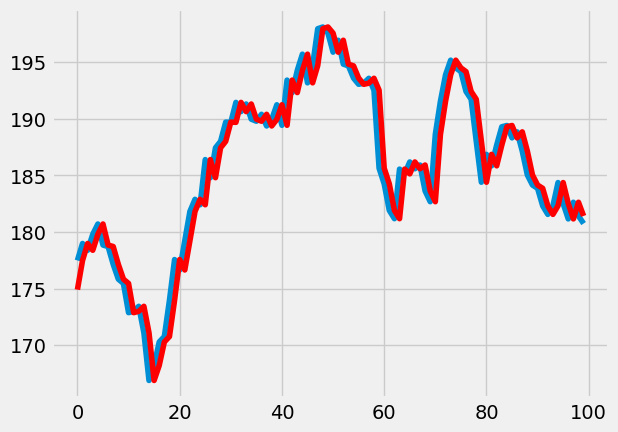

In [ ]:

# invert box-cox transform
def boxcox_inverse(value, lam):
    if lam == 0:
        return exp(value)
    return exp(log(lam * value + 1) / lam)

# load and prepare datasets
dataset = read_csv('/content/drive/MyDrive/data/app_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = dataset.values.astype('float32')
history = [x for x in X]
validation = read_csv('/content/drive/MyDrive/data/app_validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
y = validation.values.astype('float32')

# load model
model_fit = ARIMAResults.load('/content/drive/MyDrive/data/app_model.pkl')
lam = numpy.load('/content/drive/MyDrive/data/app_model_lambda.npy')

# make first prediction
predictions = list()
yhat = model_fit.forecast()[0]
yhat = boxcox_inverse(yhat, lam)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%.3f' % (yhat, y[0]))

# rolling forecasts
for i in range(1, len(y)):
    # transform
    transformed, lam = boxcox(history)
    if lam < -5:
        transformed, lam = history, 1
    # predict
    model = ARIMA(transformed, order=(0,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    yhat = boxcox_inverse(yhat, lam)
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(y, predictions))
print('RMSE: %.3f' % rmse)

pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()


# Team Contribution



|Name        | Tasks           | Time Spent           |
|-----------------|-----------------|-----------------|
| Hemraj Yadav    | Load Data, Vizualization, EDA, Decomposition, TS Model, Prediction | 40 hours |
| Amit Sai Jitta  | Time Series Decomposition, TS Model, Prediction | 25 hours |


# References

More information on the [fasteda package](https://github.com/Matt-OP/fasteda).

Yahoo Finance: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies


https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm


https://plotly.com/python/templates/


Coding practices from class mainly 10 and 11


In [2]:
from google.colab import drive
import nbconvert

# Mount Google Drive to access files
drive.mount('/content/drive')

# Provide the path to your notebook file
notebook_path = '/content/drive/MyDrive/Colab Notebooks/Group11_Final_Project_Part_2_TMSP_V2.ipynb'  # Replace with your actual notebook path

# Convert notebook to HTML
html_exporter = nbconvert.HTMLExporter()
(body, resources) = html_exporter.from_filename(notebook_path)

# Write HTML content to a file
html_file_path = '/content/drive/MyDrive/Colab Notebooks/Group11_Final_Project_Part_2_TMSP_V2.html'  # Replace with your desired HTML file path
with open(html_file_path, 'w') as f:
    f.write(body)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
